### Plotting selected spectrum

In [71]:
import os
import sys
import glob
import numpy as np
import scipy.optimize    as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import make_interp_spline
import pandas as pd

In [2]:
def info(name,L=000):
    file = fits.open(name)
    data = Table.read(file[2])
    z = data['Z']
    #print(float(z[0]))
    spectra = Table.read(file[1])
    minL = min(spectra['loglam'])
    maxL = max(spectra['loglam'])
    if (L==0):
        flux = 0
    else:
        peak = spectra[spectra['loglam']==L]
        flux  = np.mean(peak['flux'])
    file.close()
    return float(z[0]),minL,maxL,flux




In [7]:
# Define the Lyman-alpha and Lyman-beta rest wavelengths in Angtroms.
## Lines list
ll = ['LyL','Lyb','OVI','Lya','NV','OI','SiIV','CIV','CIII','CII','MgII']
# Lines dictionary
lines = {
  "LyL": [912,15,r'Ly-$\infty$',-70,3],
  "Lyb": [1025.72,30,r'Ly-$\beta$',-70,3],
  "OVI": [1035,20,r'OVI',-50,3],
  "Lya": [1215.67,10,r'Ly-$\alpha$',-70,3],
  "NV": [1240.14,20,r'NV',-40,3],
  "OI": [1302.168,10,r'OI',-40,3],
  "SiIV": [1396.76,10,'SiIV',-60,3],
  "CIV": [1549.06,10,'CIV',-50,3],
  "CIII": [1908.734,10,'CIII]',-60,3],
  "CII": [2326.44,10,'CII',-50,3],
  "MgII": [2798.75,10,'MgII',-70,3],
}

In [5]:
def qso_plotter(name,RL=3500,LL=8000):
    local_dirspc="/home/holman/FILES/catalogs/"
    spc = os.path.join(local_dirspc,name)  
    file = fits.open(spc)
    spectra = Table.read(file[1])
    file.close()
    plt.rcParams['axes.spines.left'] = True
    plt.rcParams['axes.spines.right'] = False
    plt.rcParams['axes.spines.top'] = False
    plt.rcParams['axes.spines.bottom'] = True
    plt.figure(figsize=(20,8),dpi=70)
    plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=0.7, color ='#1C448E')
    plt.plot(10**spectra['loglam'],spectra['model'],label = 'Modeled continnum',lw=1, color ='red', alpha = 0.5, linestyle = '--')
    plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
    plt.ylabel(r"$F_{\lambda}\ \left[ 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right]$", style = 'oblique', family = 'serif', size = 25)
    plt.xlabel('Wavelength [$\AA$]', style = 'oblique', family = 'serif', size = 25)
    plt.yticks(fontsize = 15)
    plt.xticks(fontsize = 15)
    plot_lim = [RL,LL]
    plt.xlim(plot_lim)
    plt.ylim(0,max(spectra['flux'])+15)
    plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)
    for a in range(11):
        v_lambda = (1+ info(spc)[0]) * lines[ll[a]][0]
        rl_i = round(np.log10(v_lambda),4)
        #print(rl_i)
        if (rl_i>=info(spc)[1]) and (rl_i<=info(spc)[2]) and (v_lambda>=plot_lim[0]) and (v_lambda<=plot_lim[1]):
            plt.arrow(v_lambda,info(spc,rl_i)[3]+lines[ll[a]][1],0,-5,length_includes_head = True,head_width = 15, head_length = 1, color = 'black')
            #print(rl_i,info(spc,rl_i)[3])
            plt.text(v_lambda+lines[ll[a]][3], info(spc,rl_i)[3]+lines[ll[a]][1]+lines[ll[a]][4], f'{lines[ll[a]][2]}', 
                     fontsize = 15,bbox = {'facecolor': '#F4F1BB', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 0)
    txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :15}       
    plt.legend(title = f'z = {round((1+ info(spc)[0]),3)}', prop = txt_prop, loc= 'upper right')
    plt.show()

    #PLOT = plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=0.7, color ='#1C448E')
    #return PLOT
    

/tmp/ipykernel_19897/1105712338.py:14: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577
2.884193181991577


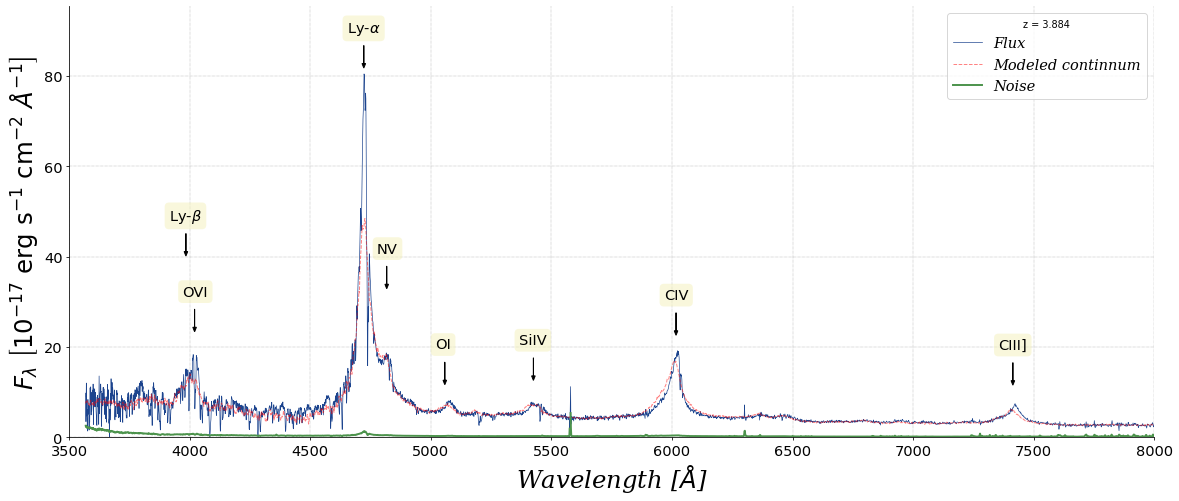

In [6]:
#"spec-7339-56799-0379_sample.fits" COMPAR
#"spec-4987-55746-0672_DLA.fits" 
#"spec-6392-56331-0942_BAL.fits" 
qso_plotter('spec-7339-56799-0379_sample.fits')

In [150]:
#raise( return bad values**** )

#plt.arrow((1+ info(spc)[0])  * lines["CIV"][0],35,-1100,0,length_includes_head = True,head_width = 1, head_length = 25, color = 'black')
#plt.arrow((1+ info(spc)[0])  * lines["Lya"][0],80,-1100,0,length_includes_head = True, head_width = 1, head_length = 25, color = 'black')
#plt.arrow((1+ info(spc)[0])  * lines["OVI"][0],40,-500,0,length_includes_head = True,head_width = 1, head_length = 25, color = 'black')

#plt.text(5300, 36.5, 'CIV absorption', fontsize = 15, 
         #bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         #rotation = text_rot, style = 'oblique')
#plt.text(3800, 81.5, r'Ly-$\alpha$ forest absorption', fontsize = 15, 
         #bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         #rotation = text_rot, style = 'oblique')
#plt.text(3550, 41.5, 'OVI absorption', fontsize = 15, 
         #bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         #rotation = text_rot, style = 'oblique')

/tmp/ipykernel_24793/1654590200.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


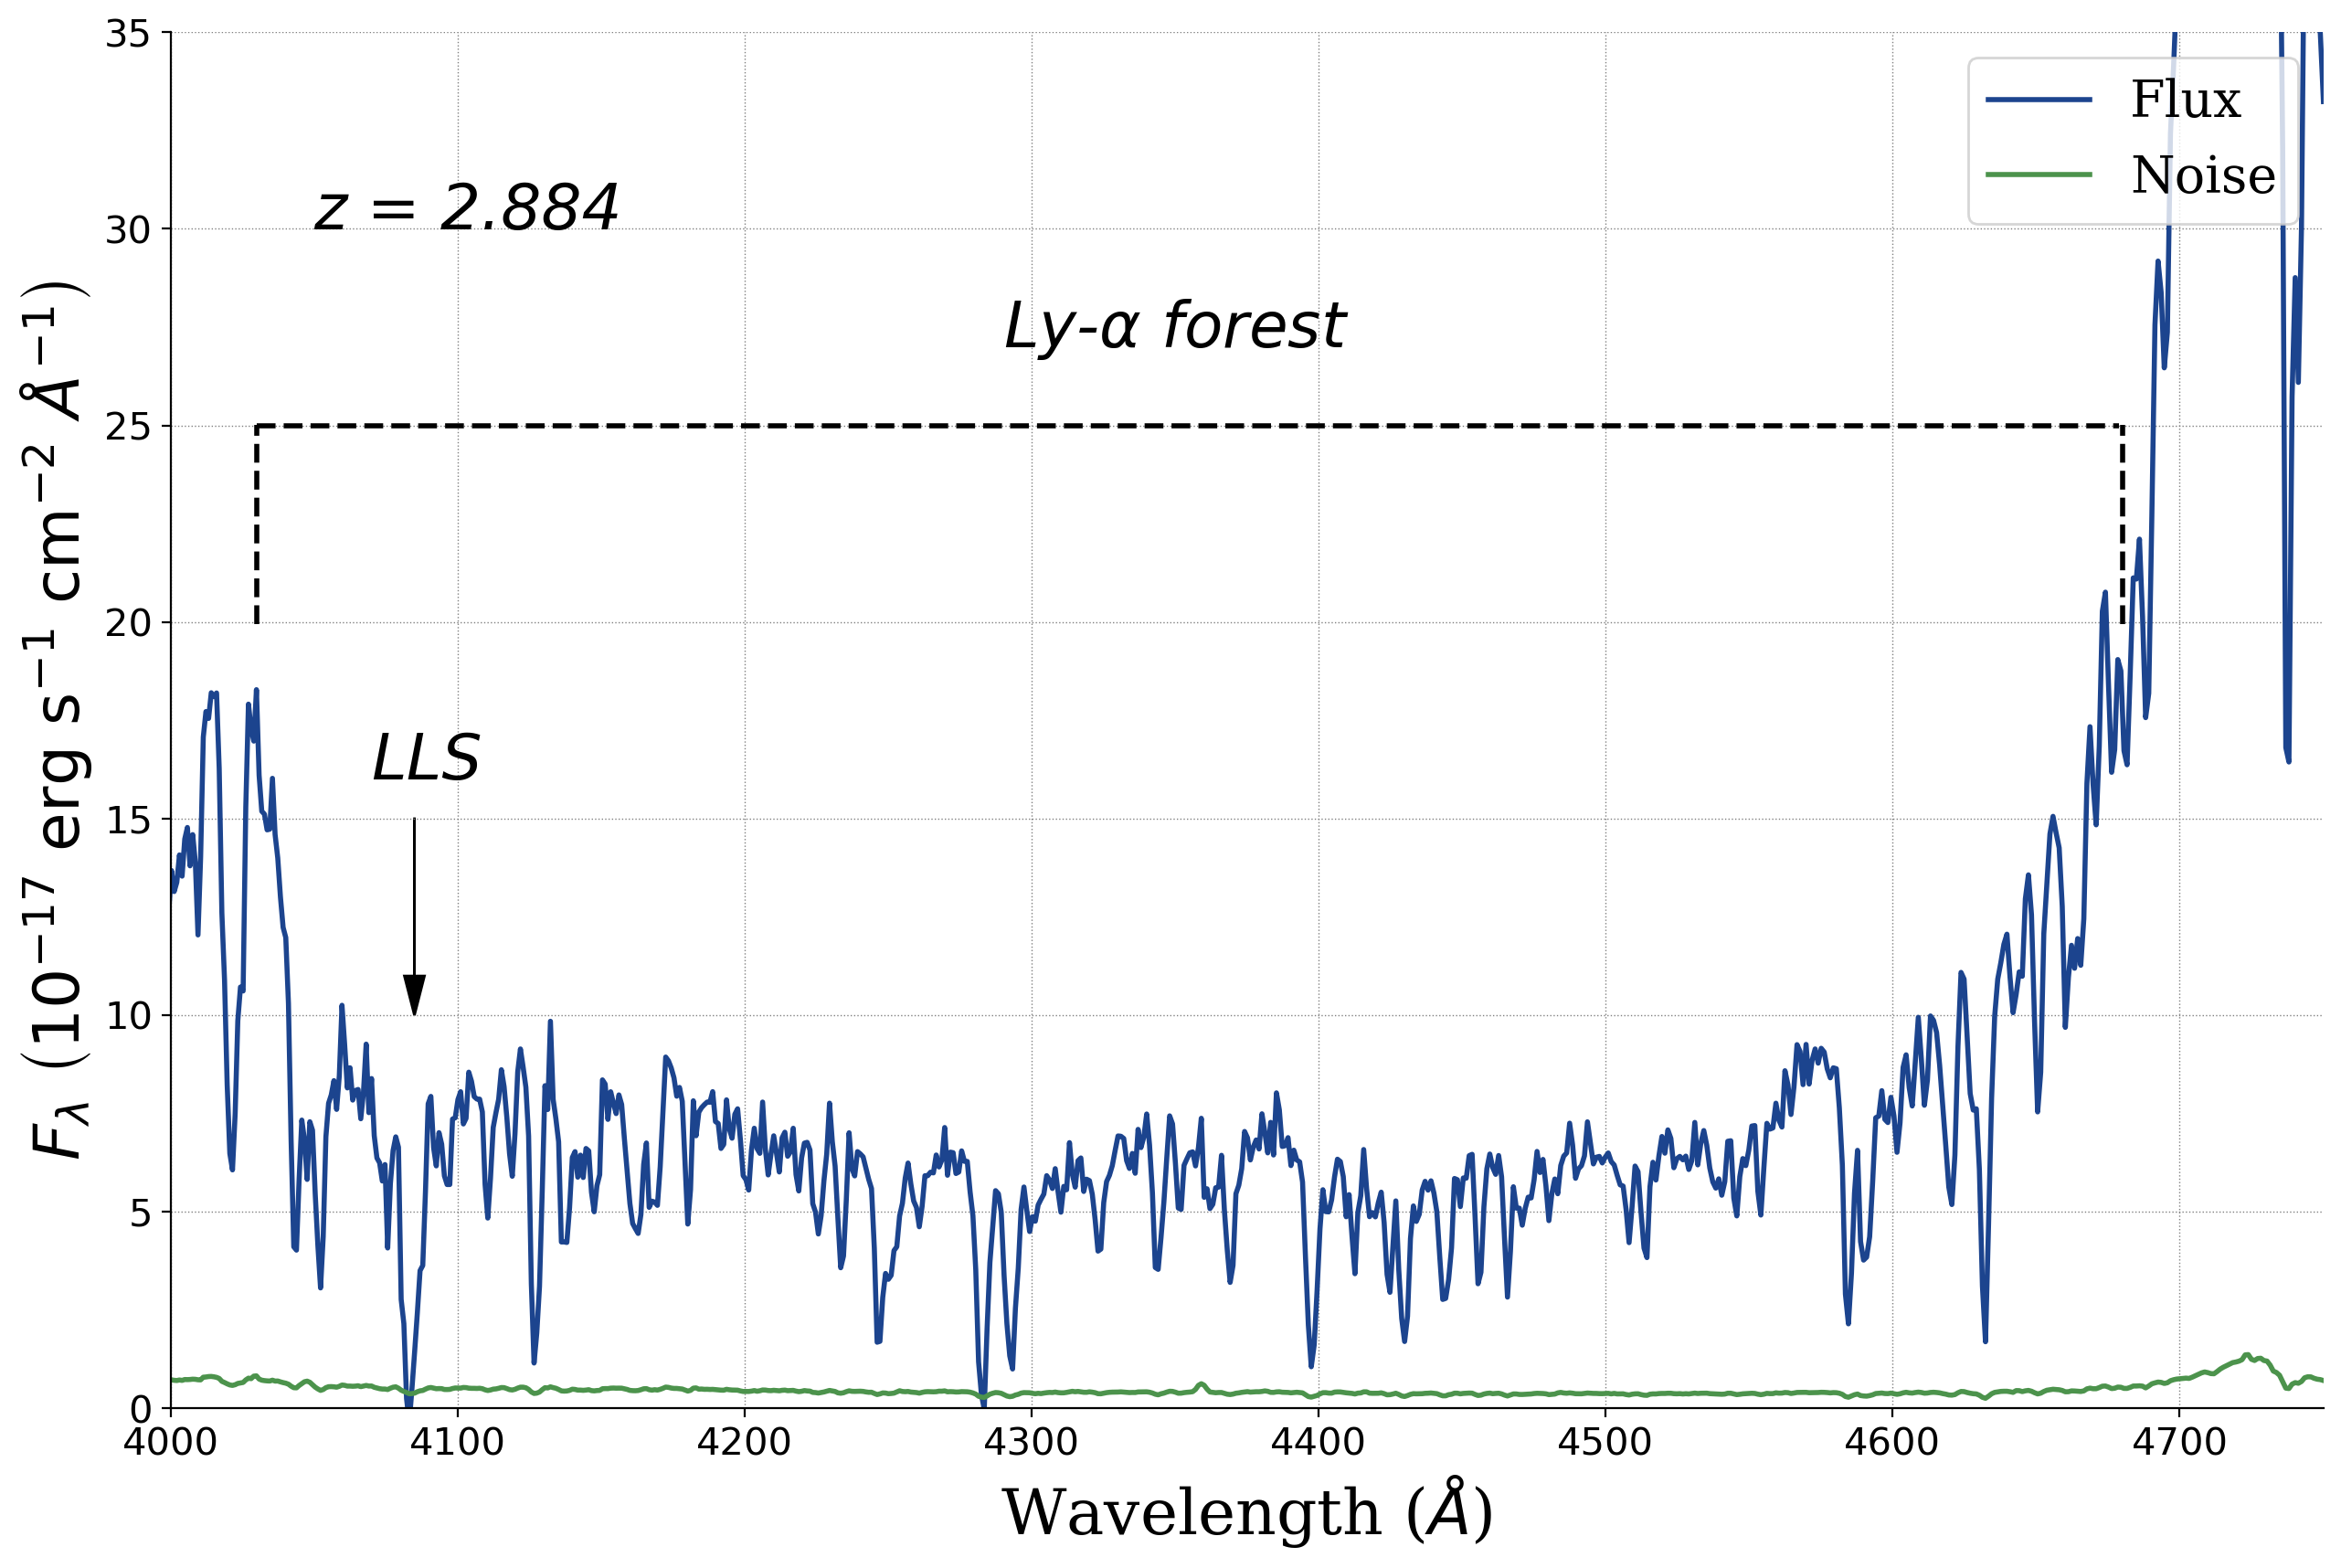

NA


In [43]:
local_dirspc="/home/holman/FILES/"
spc = os.path.join(local_dirspc,'spec-7339-56799-0379.fits')  
file = fits.open(spc)


spectra = Table.read(file)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(15.2,9.78),dpi=200)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=2.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left( 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right)$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(4000,4750)
plt.ylim(0,35)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

lw_fl = 2
lc_fl = 'black'
a_fl = 1
lb_lines = [0.22,0.27]



text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#F4F1BB'
txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
plt.axvline(4030,ymin =0.57,ymax= 0.715, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')
plt.axvline(4680,ymin =0.57,ymax= 0.715, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')

plt.axhline(25,xmin =0.04,xmax= 0.905, c=lc_fl, alpha=a_fl, linewidth = lw_fl,linestyle = '--')

plt.text(4290, 27, r'Ly-$\alpha$ forest', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')

plt.text(4050, 30, r'z = 2.884', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')


plt.arrow(4085,15,0,-5,length_includes_head = True,head_width = 7, head_length = 1, color = 'black')

plt.text(4070, 16, r'LLS', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')


plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('Lya forest', bbox_inches='tight', transparent=True,dpi=200)
plt.show()
print(tipe)

## Parts of the forest and continuum

In [25]:
delta_NAME = 'delta-33.fits.gz'
DELTA = fits.open(os.path.join(local_dirspc,delta_NAME))[55]
delta = Table.read(DELTA)

A = 0.0023
B = 3.64
C = -0.05
D = 4.36
E = 0.21

def tau(z):
    t = A*((1+z)**B)+C*np.exp((-(1+z-D)**2)/(2*(E**2)))
    return -1*t

In [27]:
mean_flux = np.exp(tau(2.884))
cont_estim = delta['CONT'][:]/mean_flux

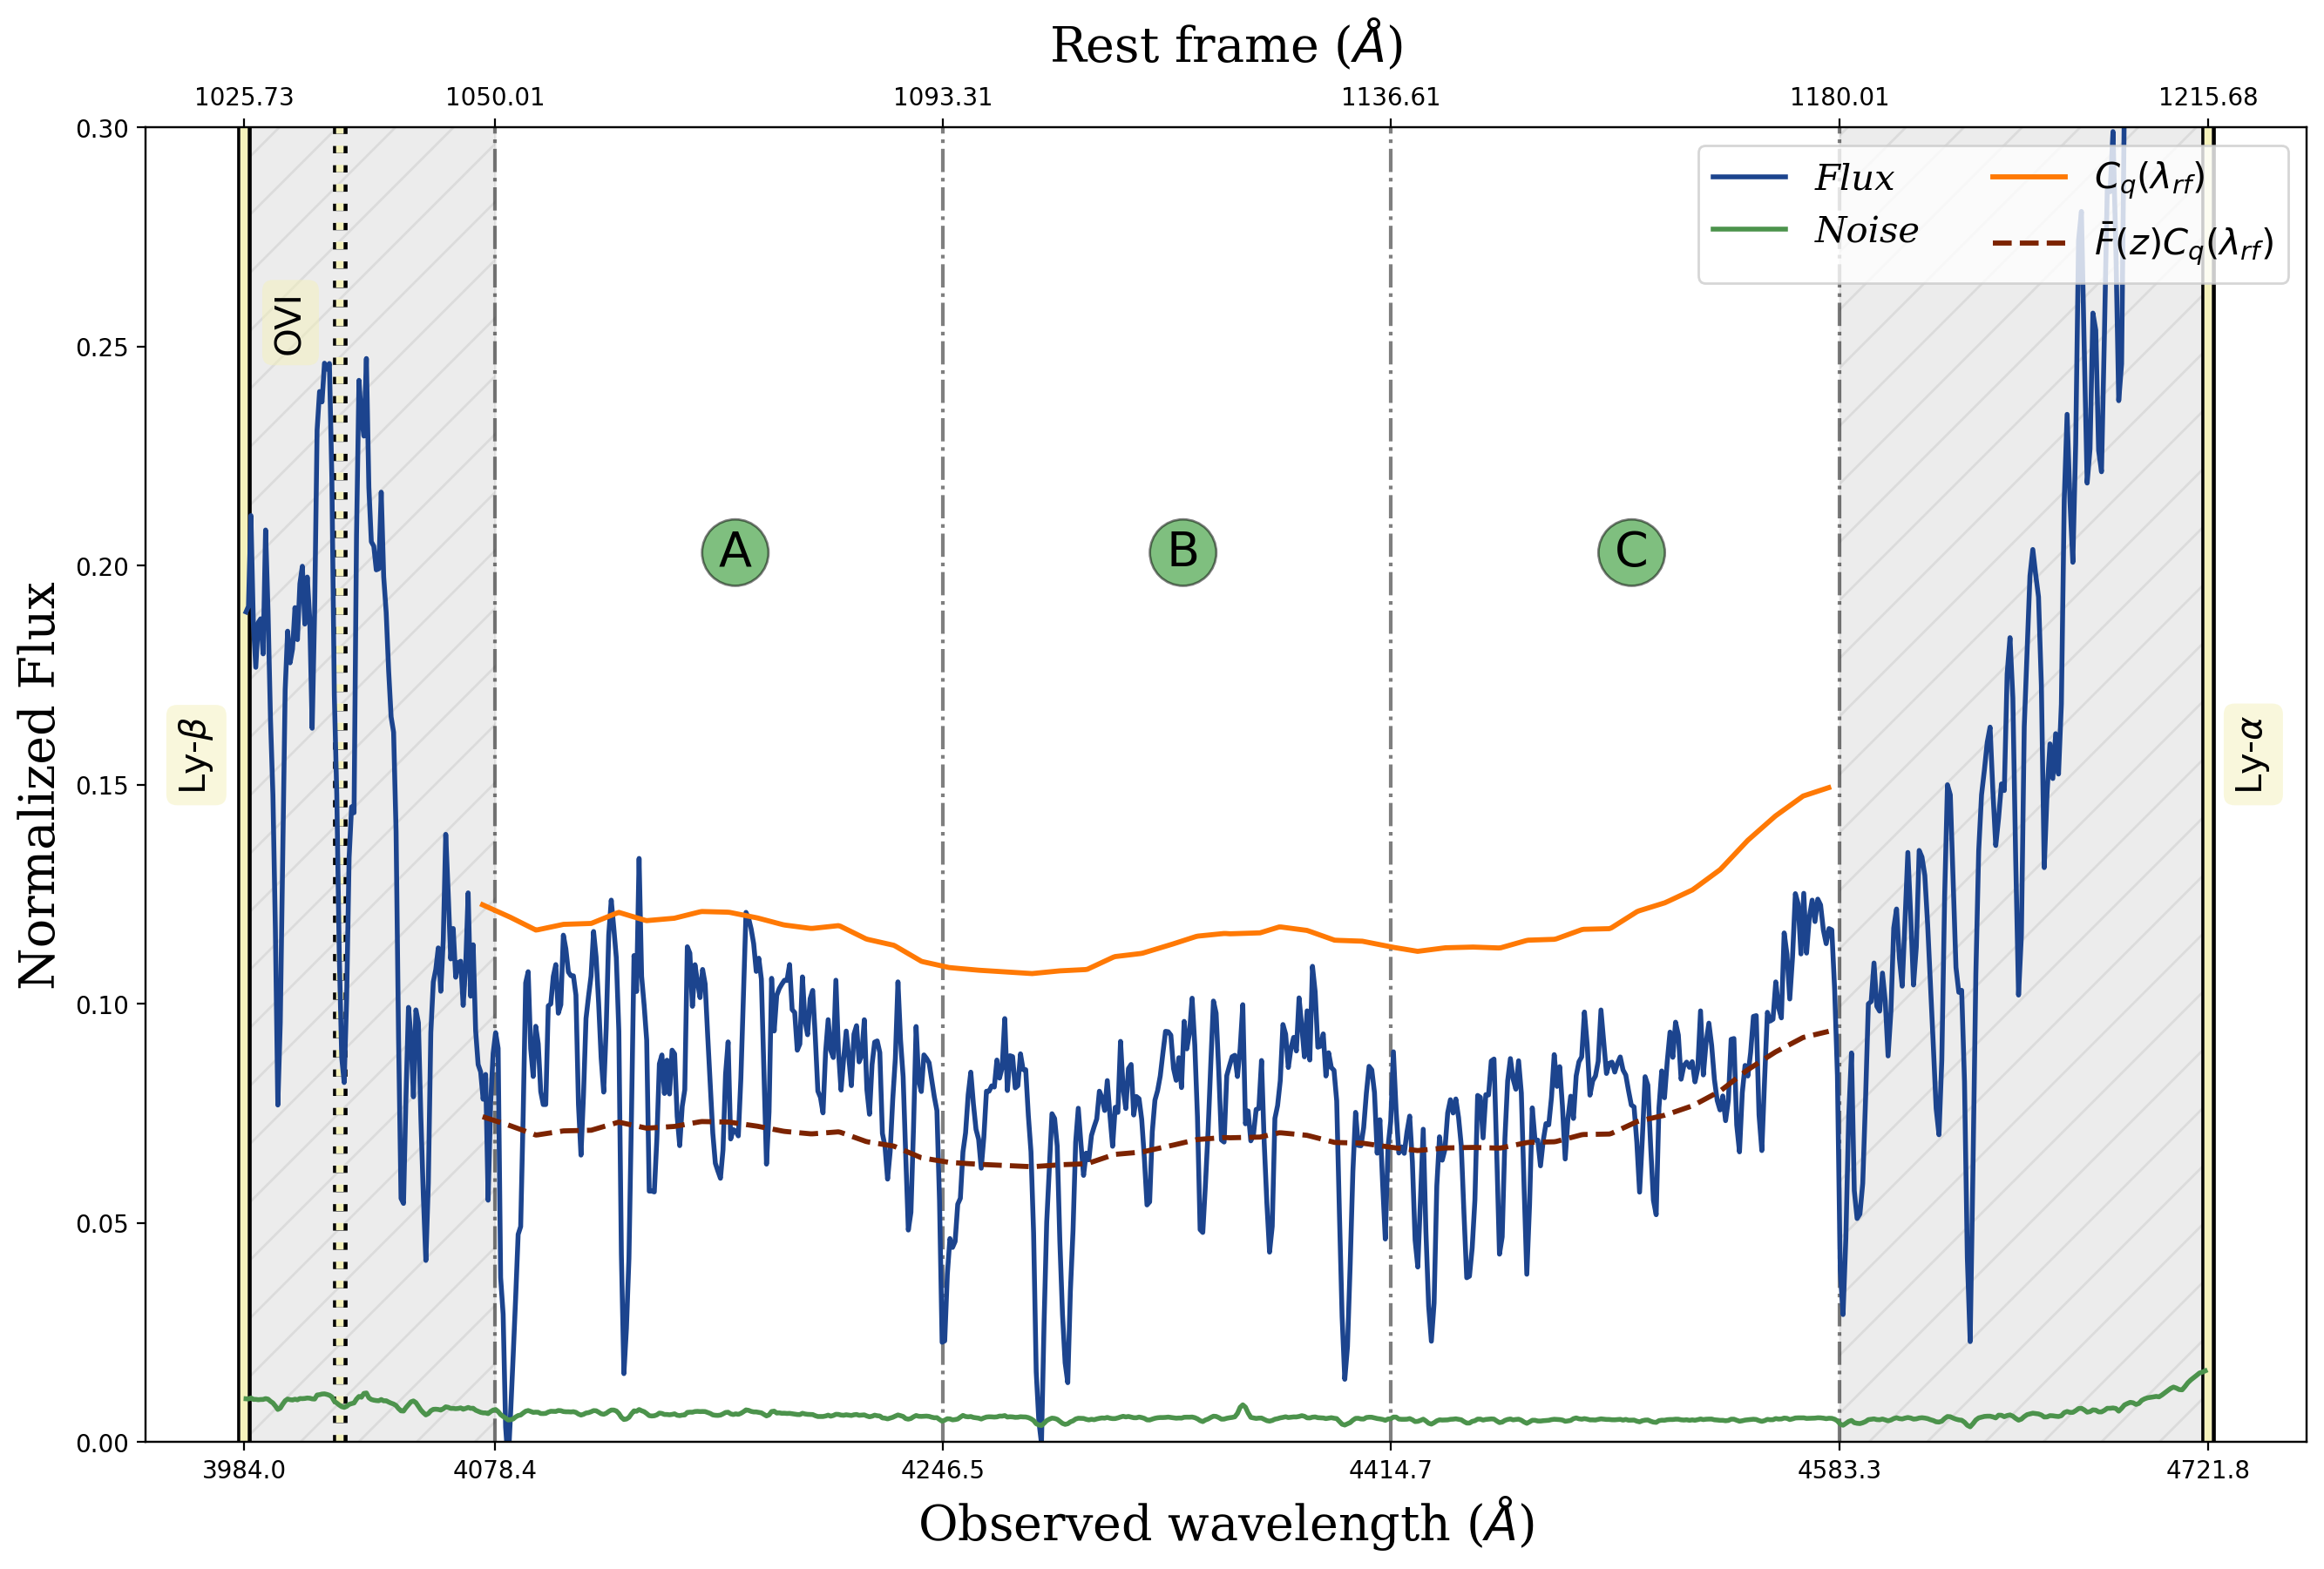

In [43]:
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

REDSHIFT = 2.884


import matplotlib.patheffects as mpe

pe1 = [mpe.Stroke(linewidth=6, foreground='black'),
       mpe.Stroke(foreground='white',alpha=1),
       mpe.Normal()]

#figsize=(15.2,7.2)

fig, ax_main = plt.subplots(figsize=(16,9.8),dpi=200)

wave_cut=((10**spectra['loglam'])>(1. + REDSHIFT) * lines["Lyb"][0]) & ((10**spectra['loglam'])<(1. + REDSHIFT) * lines["Lya"][0])
forest = spectra[wave_cut]

plt.axvline((1+ REDSHIFT) * lines["Lya"][0], c='#F4F1BB', alpha=1, lw=3, path_effects=pe1)
plt.axvline((1+ REDSHIFT) * lines["Lyb"][0], c='#F4F1BB', alpha=1, lw =3, path_effects=pe1)
plt.axvline((1+ REDSHIFT) * 1050, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ REDSHIFT) * 1093.3, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ REDSHIFT) * 1136.6, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ REDSHIFT) * 1180, c='black', alpha=0.5,ls ="-.", linewidth = 1.5)
plt.axvline((1+ REDSHIFT) * lines["OVI"][0], c='#F4F1BB', alpha=1,ls =":", linewidth = 3, path_effects=pe1)

RUIDO = np.array(1/np.sqrt(forest['ivar']))

plt.plot(10**forest['loglam'],forest['flux']/max(forest['flux']),lw=2, color ='#1C448E',label = 'Flux')
plt.plot(10**forest['loglam'],RUIDO/max(forest['flux']),lw=2, color = '#4C934C',label = 'Noise')


plt.plot(delta['LAMBDA'][:],cont_estim/max(forest['flux']),lw=2.1, color = '#ff7904',label = r'${C}_{q}({\lambda}_{rf})$')
plt.plot(delta['LAMBDA'][:],delta['CONT'][:]/max(forest['flux'])-0.015,lw=2.1, color = '#7c2300', #'#7c2300'
         label = r'$\bar{F}(z){C}_{q}({\lambda}_{rf})$',linestyle='dashed')


ax_main.fill_between([3984.0,4078.4],0.5,alpha = 0.15, color = 'gray',hatch = '/')
ax_main.fill_between([4583.3,4721.8],0.5,alpha = 0.15, color = 'gray',hatch = '/')

plt.ylim(0,0.3)
plt.ylabel('Normalized Flux', style = 'normal', family = 'serif', size = 20) #'Flux 1E-17 erg/cm^2/s/Ang'
plt.xlabel('Observed wavelength ($\AA$)', style = 'normal', family = 'serif', size = 20)

xtics = np.array([(1+ REDSHIFT) * lines["Lyb"][0],(1+ REDSHIFT) * 1050,(1+ REDSHIFT) * 1093.3,
             (1+ REDSHIFT) * 1136.6,(1+ REDSHIFT) * 1180,(1+ REDSHIFT) * lines["Lya"][0]])
#plt.xticks(xtics)

ax_main.set_xlabel('Observed wavelength ($\AA$)', style = 'normal', family = 'serif', size = 20)
ax_main.set_ylabel('Normalized Flux', style = 'normal', family = 'serif', size = 20)
ax_main.set_ylim(0,0.3)
ax_main.set_xticks([3984.0476,4078.3547,4246.5386,4414.7217,4583.294,4721.842 ])
labels1 = [item.get_text() for item in ax_main.get_xticklabels()]
ax_main.set_xticklabels([str(round(float(label), 1)) for label in labels1])


plt.text((1+ REDSHIFT) * 1071.65, 0.20, 'A', fontsize = 20, 
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))
plt.text((1+ REDSHIFT) * 1114.95, 0.20, 'B', fontsize = 20, 
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))
plt.text((1+ REDSHIFT) * 1158.3, 0.20, 'C', fontsize = 20,
         bbox = dict(facecolor = 'green', alpha = 0.5,boxstyle=f"circle,pad={0.2}"))

plt.text((1+ REDSHIFT) * lines["Lya"][0]+10, 0.15, r'Ly-$\alpha$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)
plt.text((1+ REDSHIFT) * lines["Lyb"][0]-25, 0.15, r'Ly-$\beta$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)
plt.text((1+ REDSHIFT) * lines["OVI"][0]-25, 0.25, 'OVI', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = 90)

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :15}
plt.legend(prop = txt_prop, loc= 'upper right', ncol = 2)


ax2 = ax_main.twiny()
ax1Ticks = ax_main.get_xticks()   
ax2Ticks = ax1Ticks

def tick_function(X):
    V = X/(1+add['Z']) + 0.01
    return ["%.3f" % z for z in V]

ax2.set_xticks(ax2Ticks)
ax2.set_xbound(ax_main.get_xbound())
ax2.set_xticklabels(tick_function(ax2Ticks))
ax2.set_xlabel(r'Rest frame ($\AA$)', style = 'normal', family = 'serif', size = 20,labelpad=10)
labels2 = [item.get_text() for item in ax2.get_xticklabels()]
ax2.set_xticklabels([str(round(float(label), 2)) for label in labels2])

txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
#plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('Forest division', bbox_inches='tight', transparent=True,dpi=200)
plt.show()



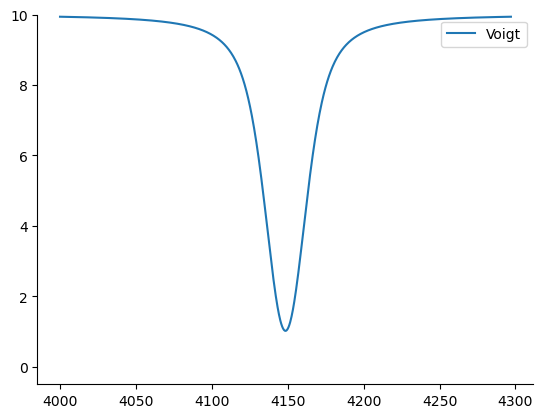

In [46]:
import numpy as np
from scipy.special import wofz
import pylab

def G(x, alpha):
    """ Return Gaussian line shape at x with HWHM alpha """
    return np.sqrt(np.log(2) / np.pi) / alpha\
                             * np.exp(-(x / alpha)**2 * np.log(2))

def L(x, gamma):
    """ Return Lorentzian line shape at x with HWHM gamma """
    return gamma / np.pi / (x**2 + gamma**2)

def V(x, alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz((x + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi)

alpha, gamma = 0.1, 0.1
x = np.linspace(-148.5,148.5,1000)
#pylab.plot(x, G(x, alpha), ls=':', label='Gaussian')
#pylab.plot(x, L(x, gamma), ls='--', label='Lorentzian')
pylab.plot(x+4148.50, 10+(-40*V(x*0.1, 1, 1)), label='Voigt')
#pylab.xlim(-0.8,0.8)
pylab.ylim(-0.5,10)
pylab.legend()
pylab.show()


## DLA y BAL examples

/tmp/ipykernel_27750/598693054.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


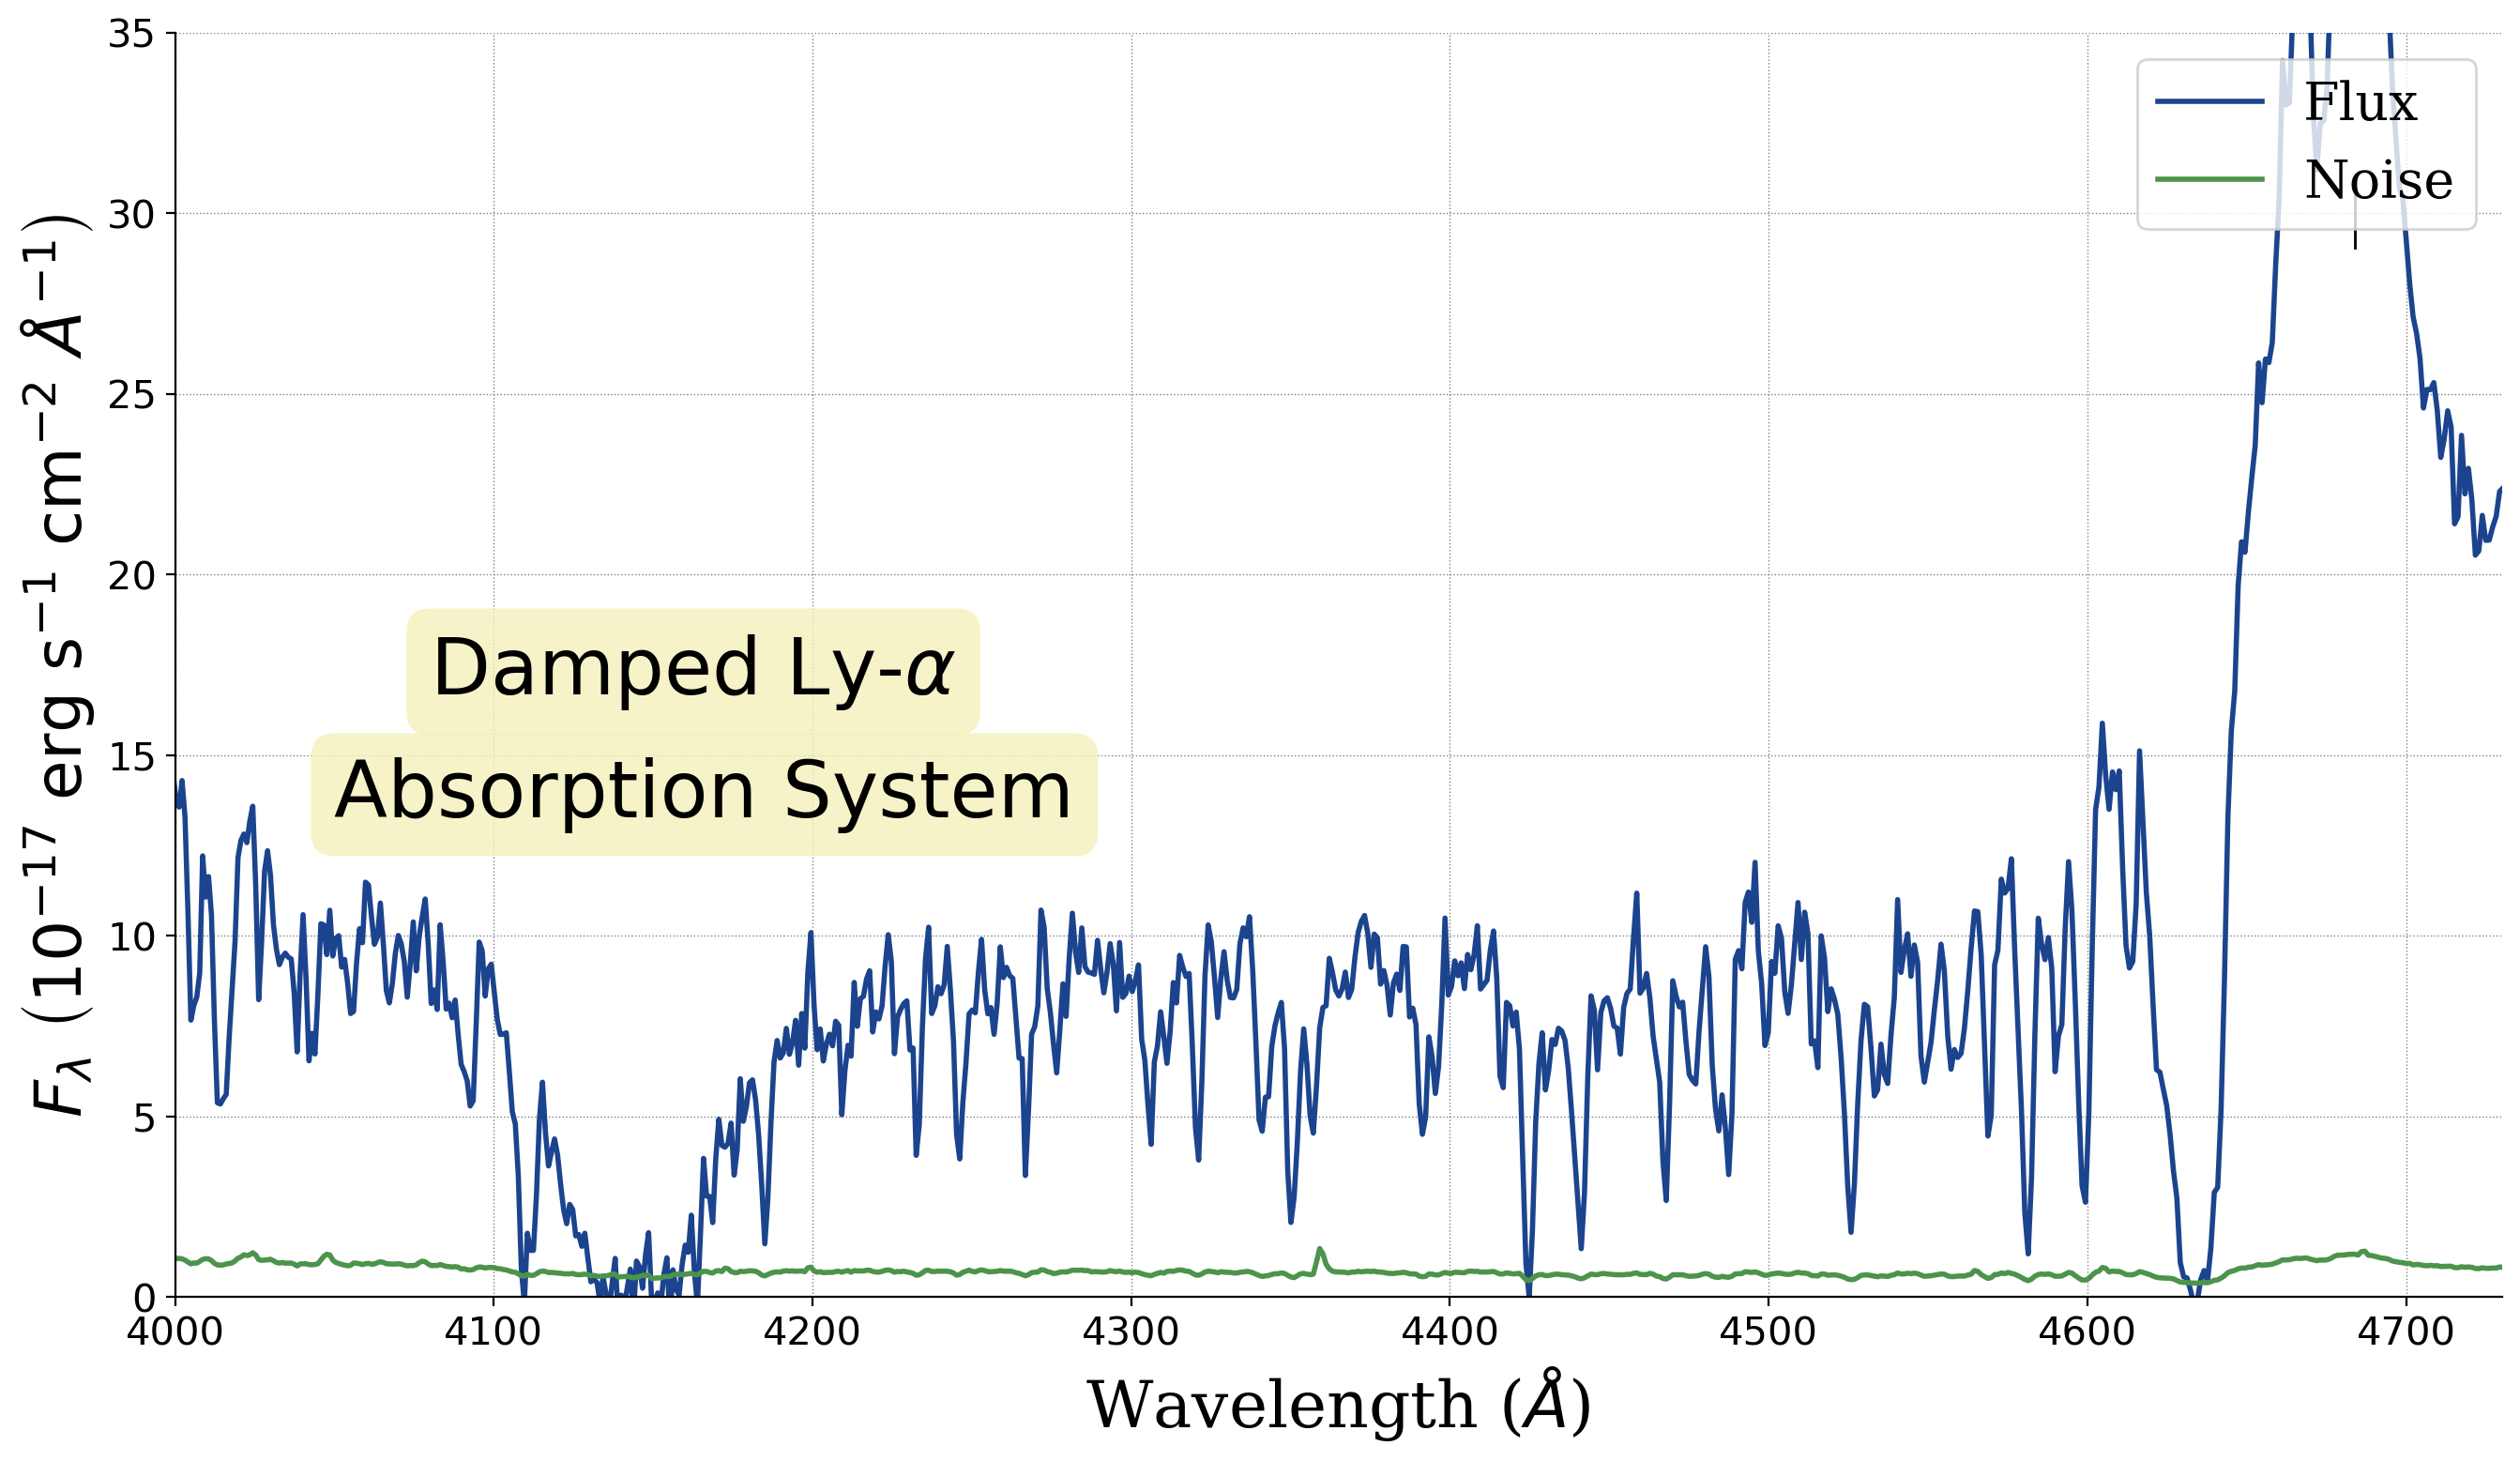

In [44]:
file_spc="spec-4987-55746-0672.fits"

keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]

spc = os.path.join(local_dirspc,file_spc)

spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(16,8.75),dpi=200)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=2.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left( 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right)$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlim(4000,4730)
plt.ylim(0,35)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)


plt.axvline((1+ 2.853) * lines["Lya"][0],ymin =0.83,ymax= 0.88, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ 2.853) * lines["Lyb"][0]+15,ymin =0.40,ymax= 0.45, c=lc_fl, alpha=a_fl, linewidth = lw_fl)


plt.text(4080, 16.7, r'Damped Ly-$\alpha$', fontsize = 30, 
         bbox = {'facecolor': text_fc, 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text(4050, 13.3, r'Absorption System', fontsize = 30, 
         bbox = {'facecolor': text_fc, 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('eBOSS DLA', bbox_inches='tight', transparent=True,dpi=200)
plt.show()


/tmp/ipykernel_27750/2439070519.py:10: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


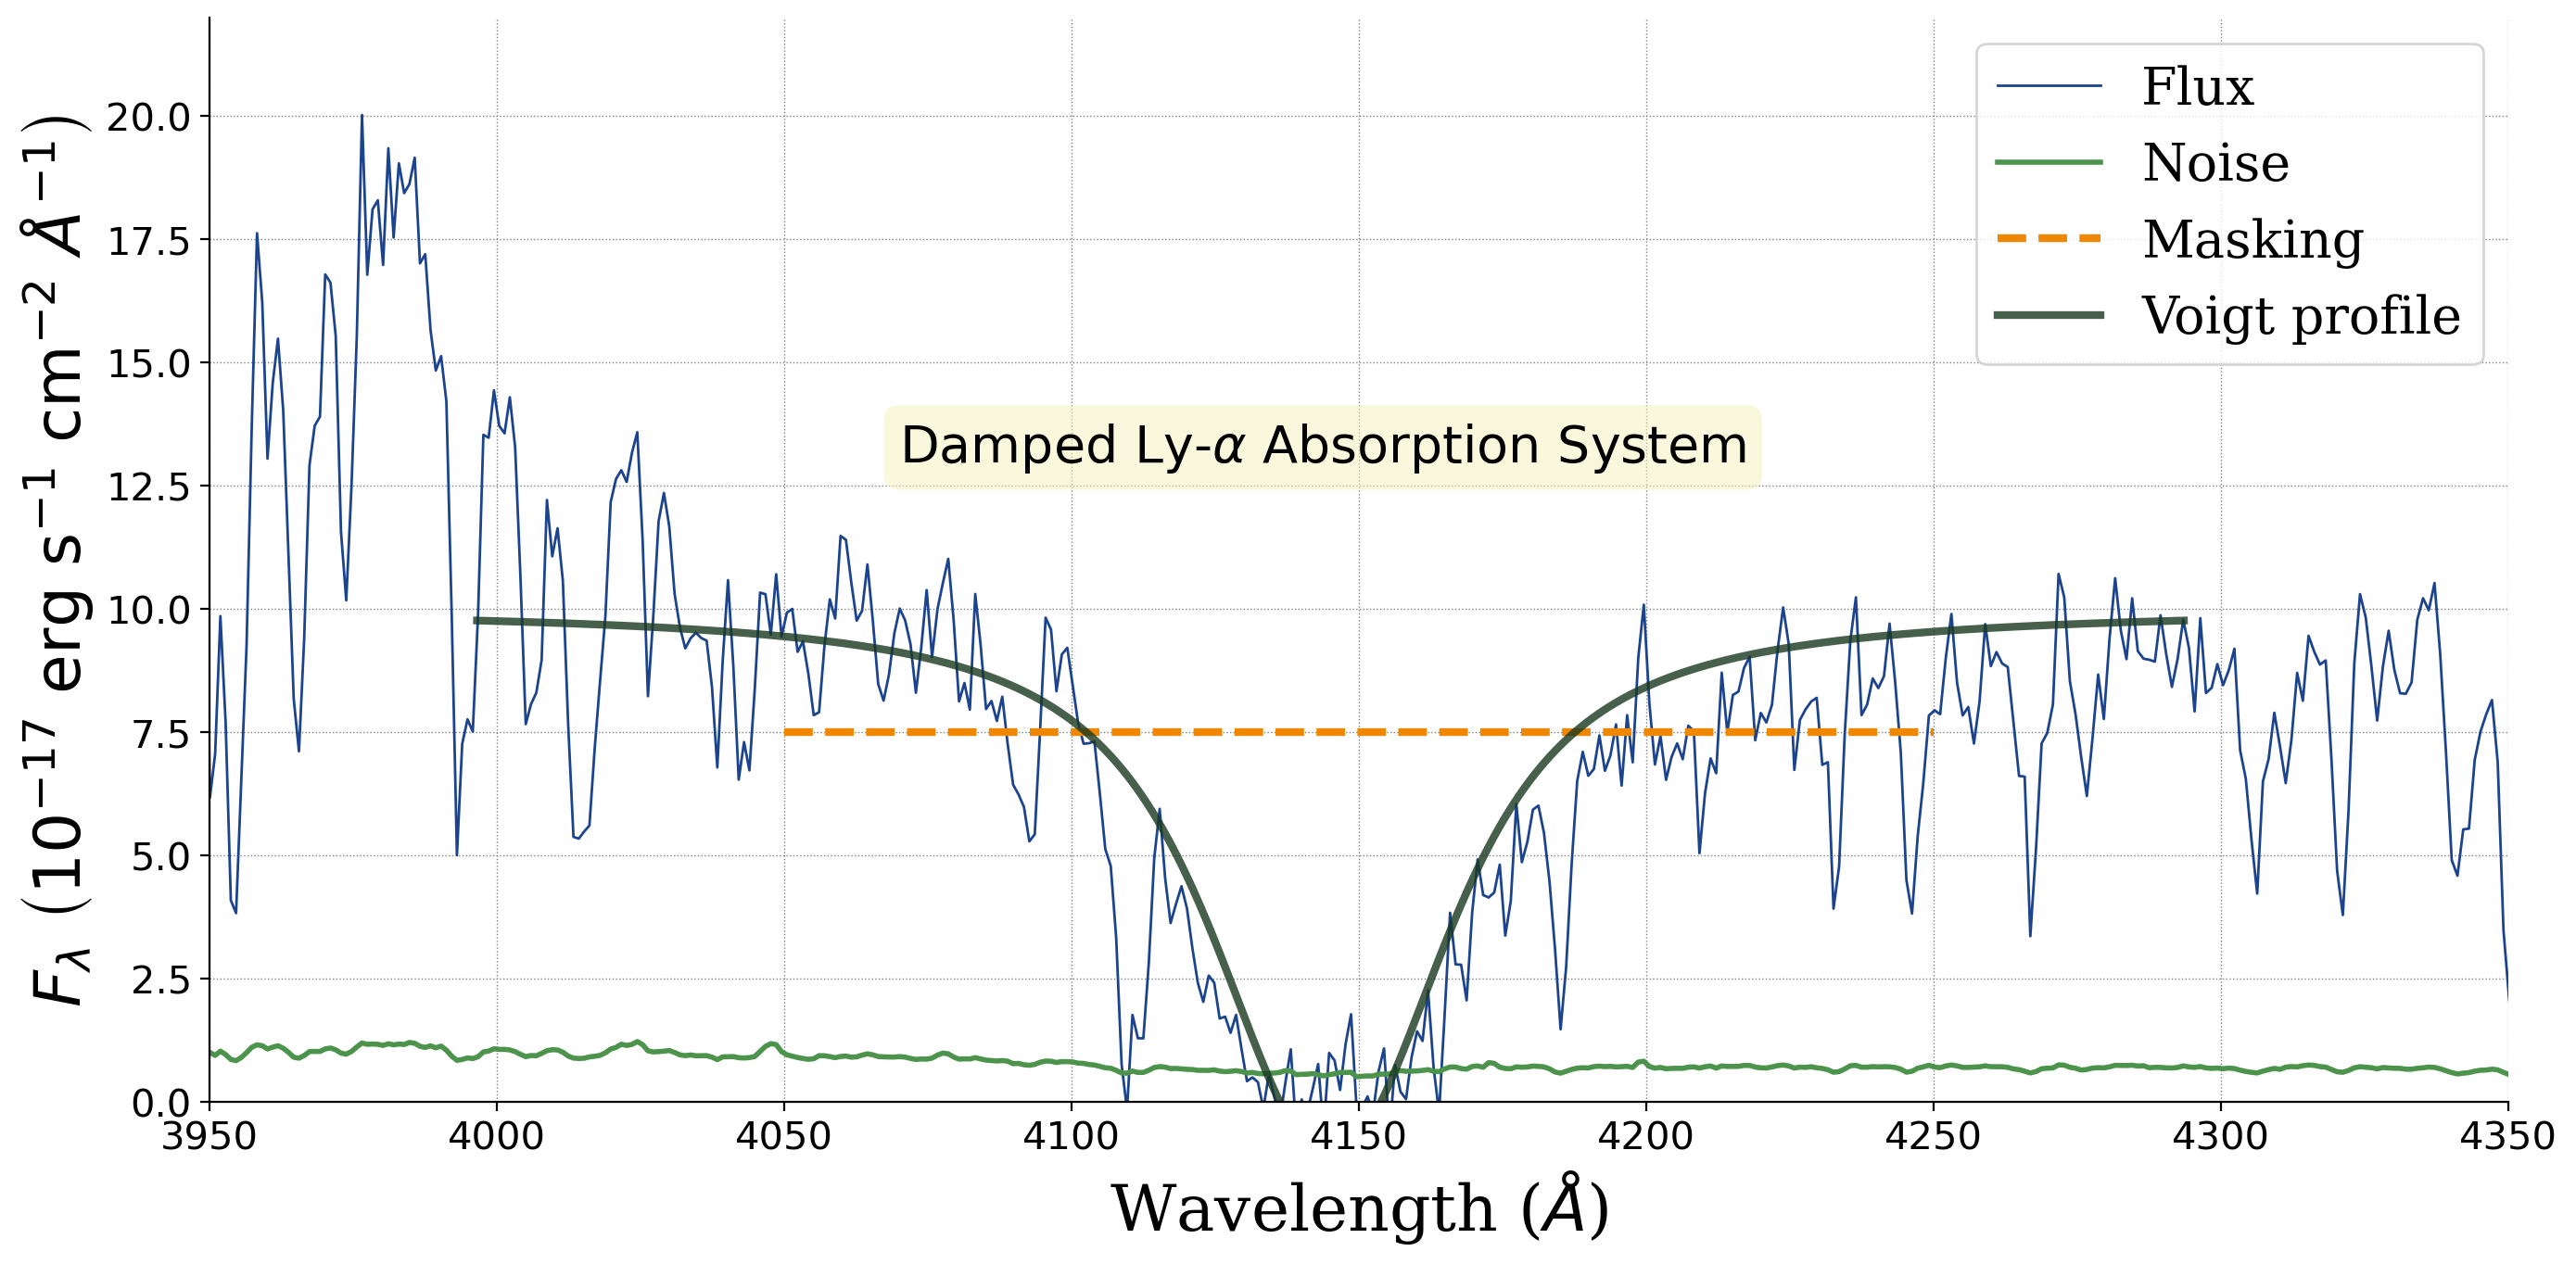

In [58]:
import pylab

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(16,7.6),dpi=200)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=1.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left( 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right)$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlim(3950,4350)
#plt.xlim(4148,4150)
#plt.ylim(0,2)
plt.ylim(0,22)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

plt.axhline(y = 7.5, xmin = 0.25, xmax = 0.75,color = '#F08700', label='Masking',linewidth = 3, ls ='--')

plt.text(4070, 13, r'Damped Ly-$\alpha$ Absorption System', fontsize = 20, 
         bbox = {'facecolor': text_fc, 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)



alpha, gamma = 0.1, 0.1
x = np.linspace(-148.5,148.5,1000)
pylab.plot(x+4145, 10+(-80*V(x*0.1, 1, 2)), label='Voigt profile',linewidth = 3, alpha = 0.8, color = '#19381F')
#pylab.xlim(-0.8,0.8)

plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('eBOSS DLA mask', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

/tmp/ipykernel_24793/181759148.py:19: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


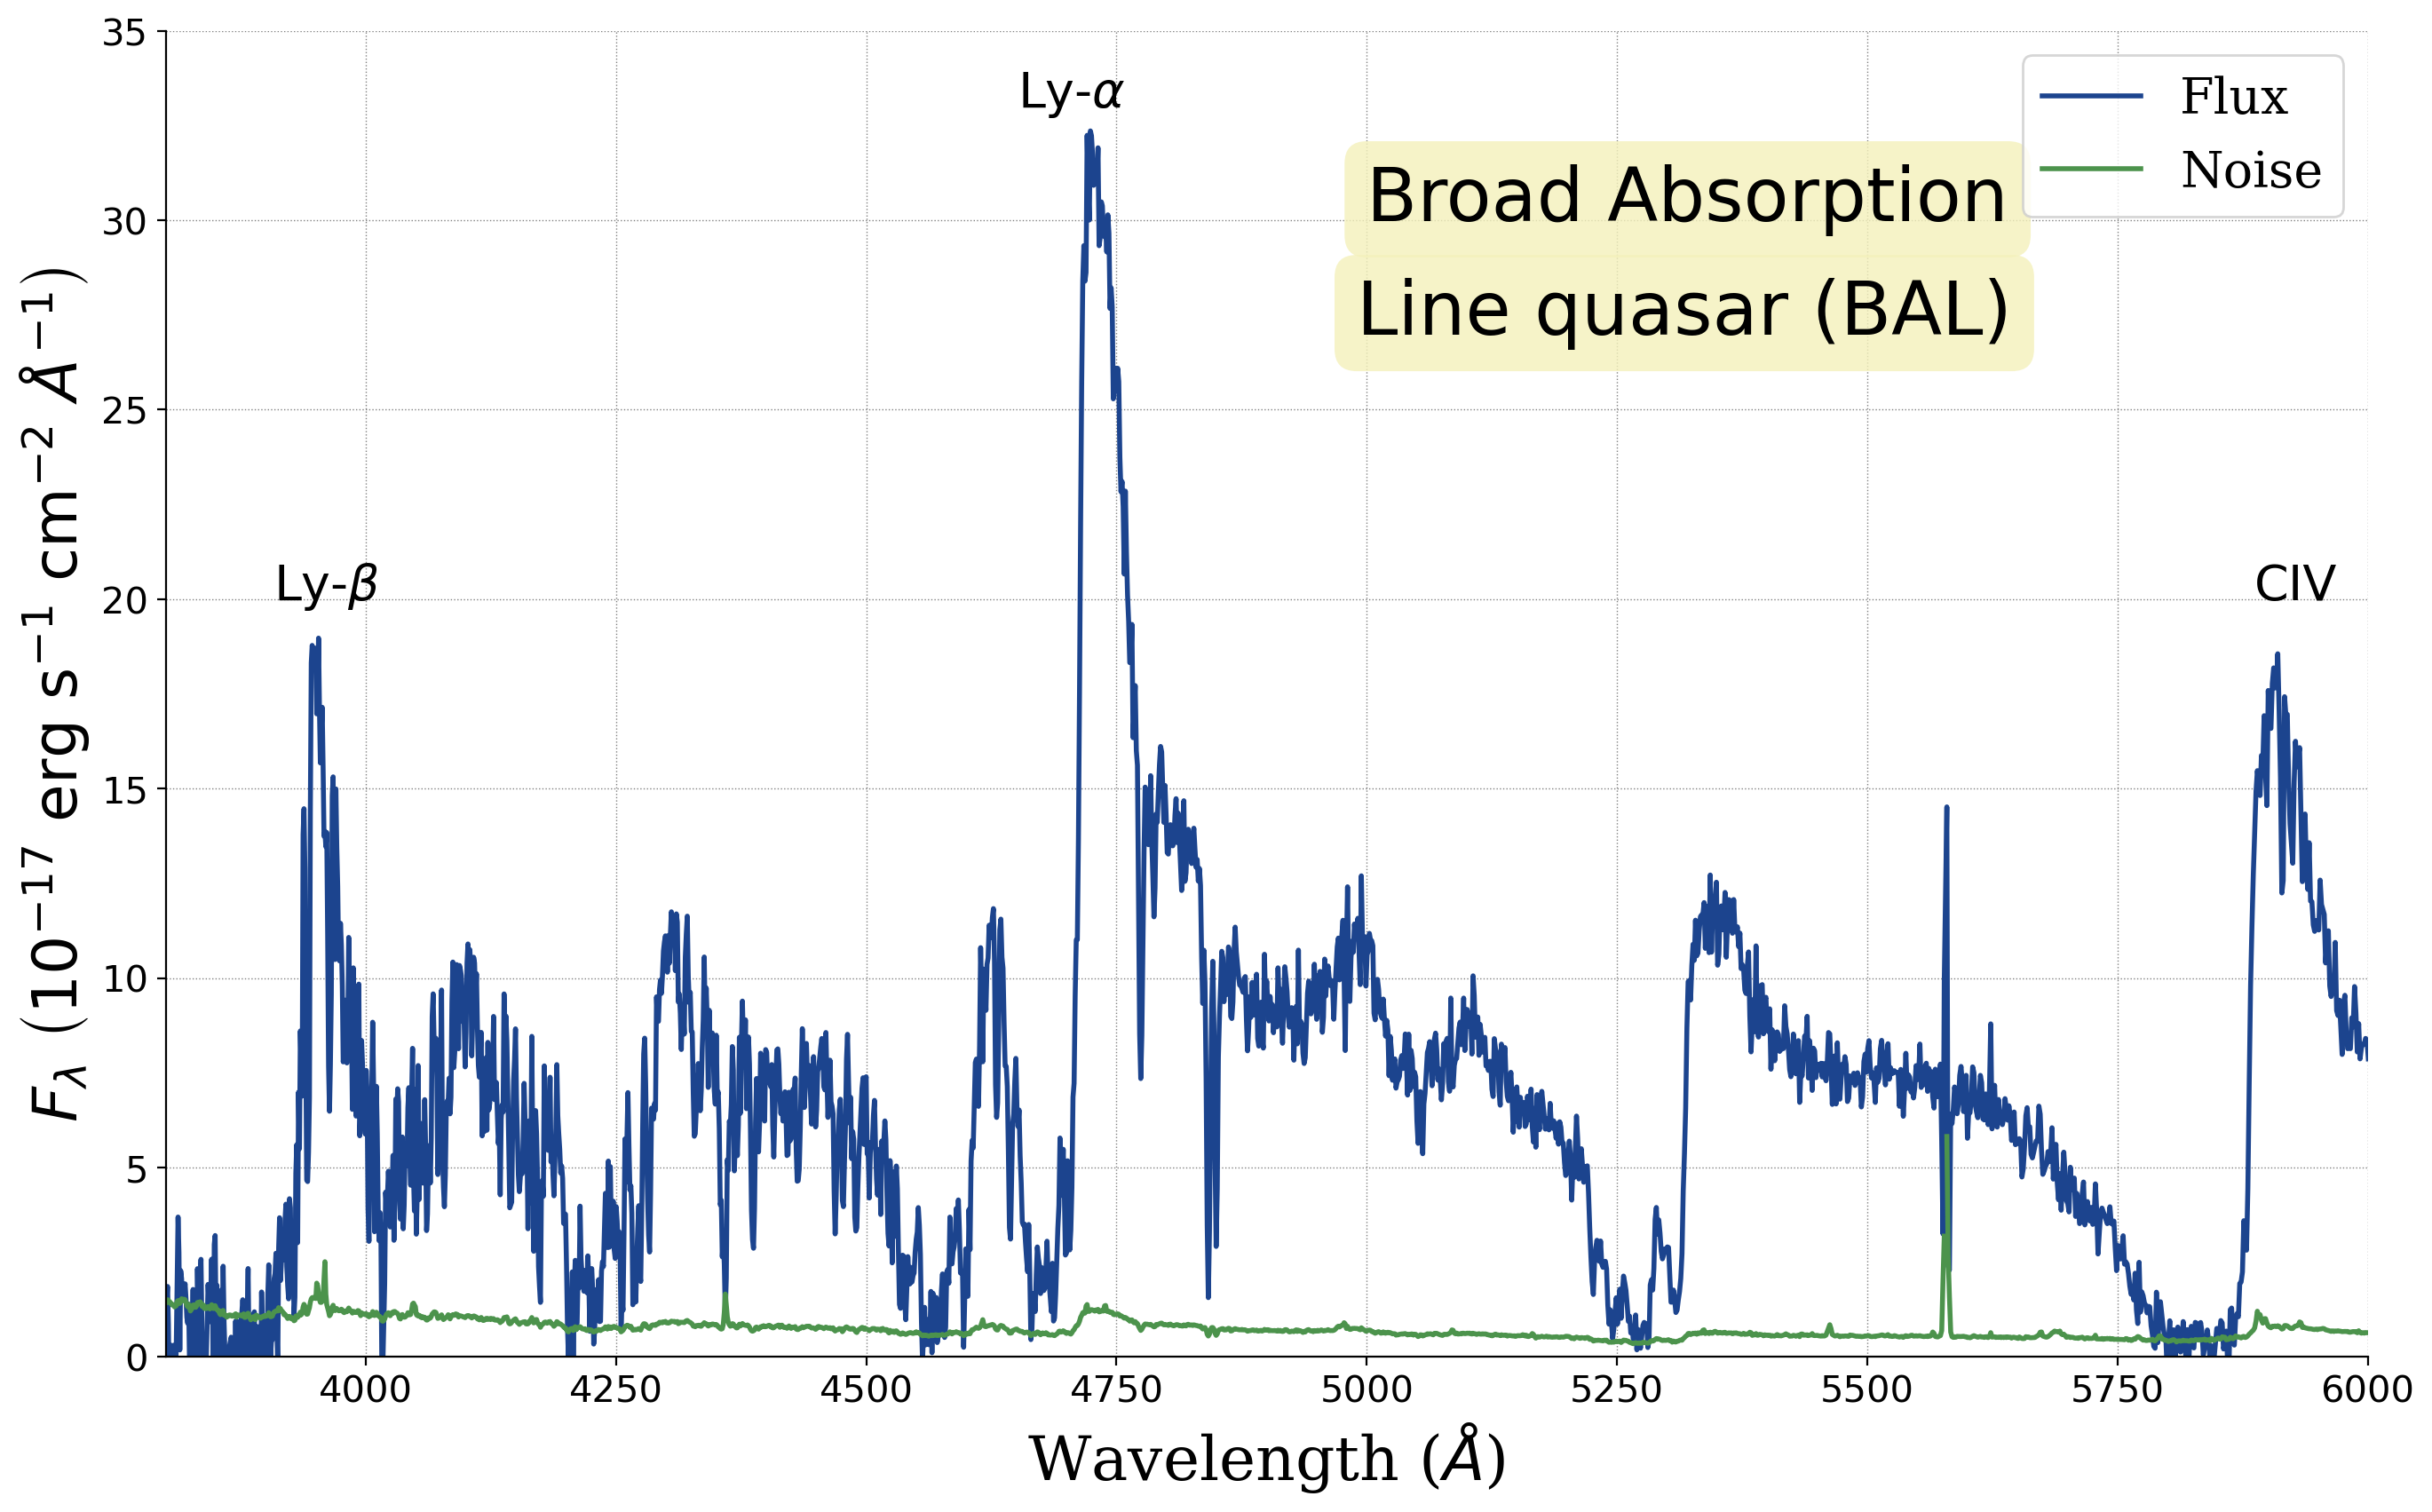

In [73]:
file_spc="spec-6392-56331-0942.fits"

keys = [int(file_spc[5:9]),int(file_spc[10:15]),int(file_spc[16:20])]

spc = os.path.join(local_dirspc,file_spc)

spectra = Table.read(spc)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

plt.figure(figsize=(16,9.7),dpi=200)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux',lw=2.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left( 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right)$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.xlim(3800,6000)
plt.ylim(0,35)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

plt.text(((1+2.8)*1216)+30, 33, r'Ly-$\alpha$', fontsize = 20, 
         bbox = {'facecolor': 'none', 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text(((1+2.8)*1025.72)+10, 20, r'Ly-$\beta$', fontsize = 20, 
         bbox = {'facecolor': 'none', 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text(((1+2.8)*1549.06), 20, r'CIV', fontsize = 20, 
         bbox = {'facecolor': 'none', 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text(5000, 30, r'Broad Absorption', fontsize = 30, 
         bbox = {'facecolor': text_fc, 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)
plt.text(4990, 27, r'Line quasar (BAL)', fontsize = 30, 
         bbox = {'facecolor': text_fc, 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('eBOSS BAL', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

/tmp/ipykernel_27750/4229042078.py:20: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


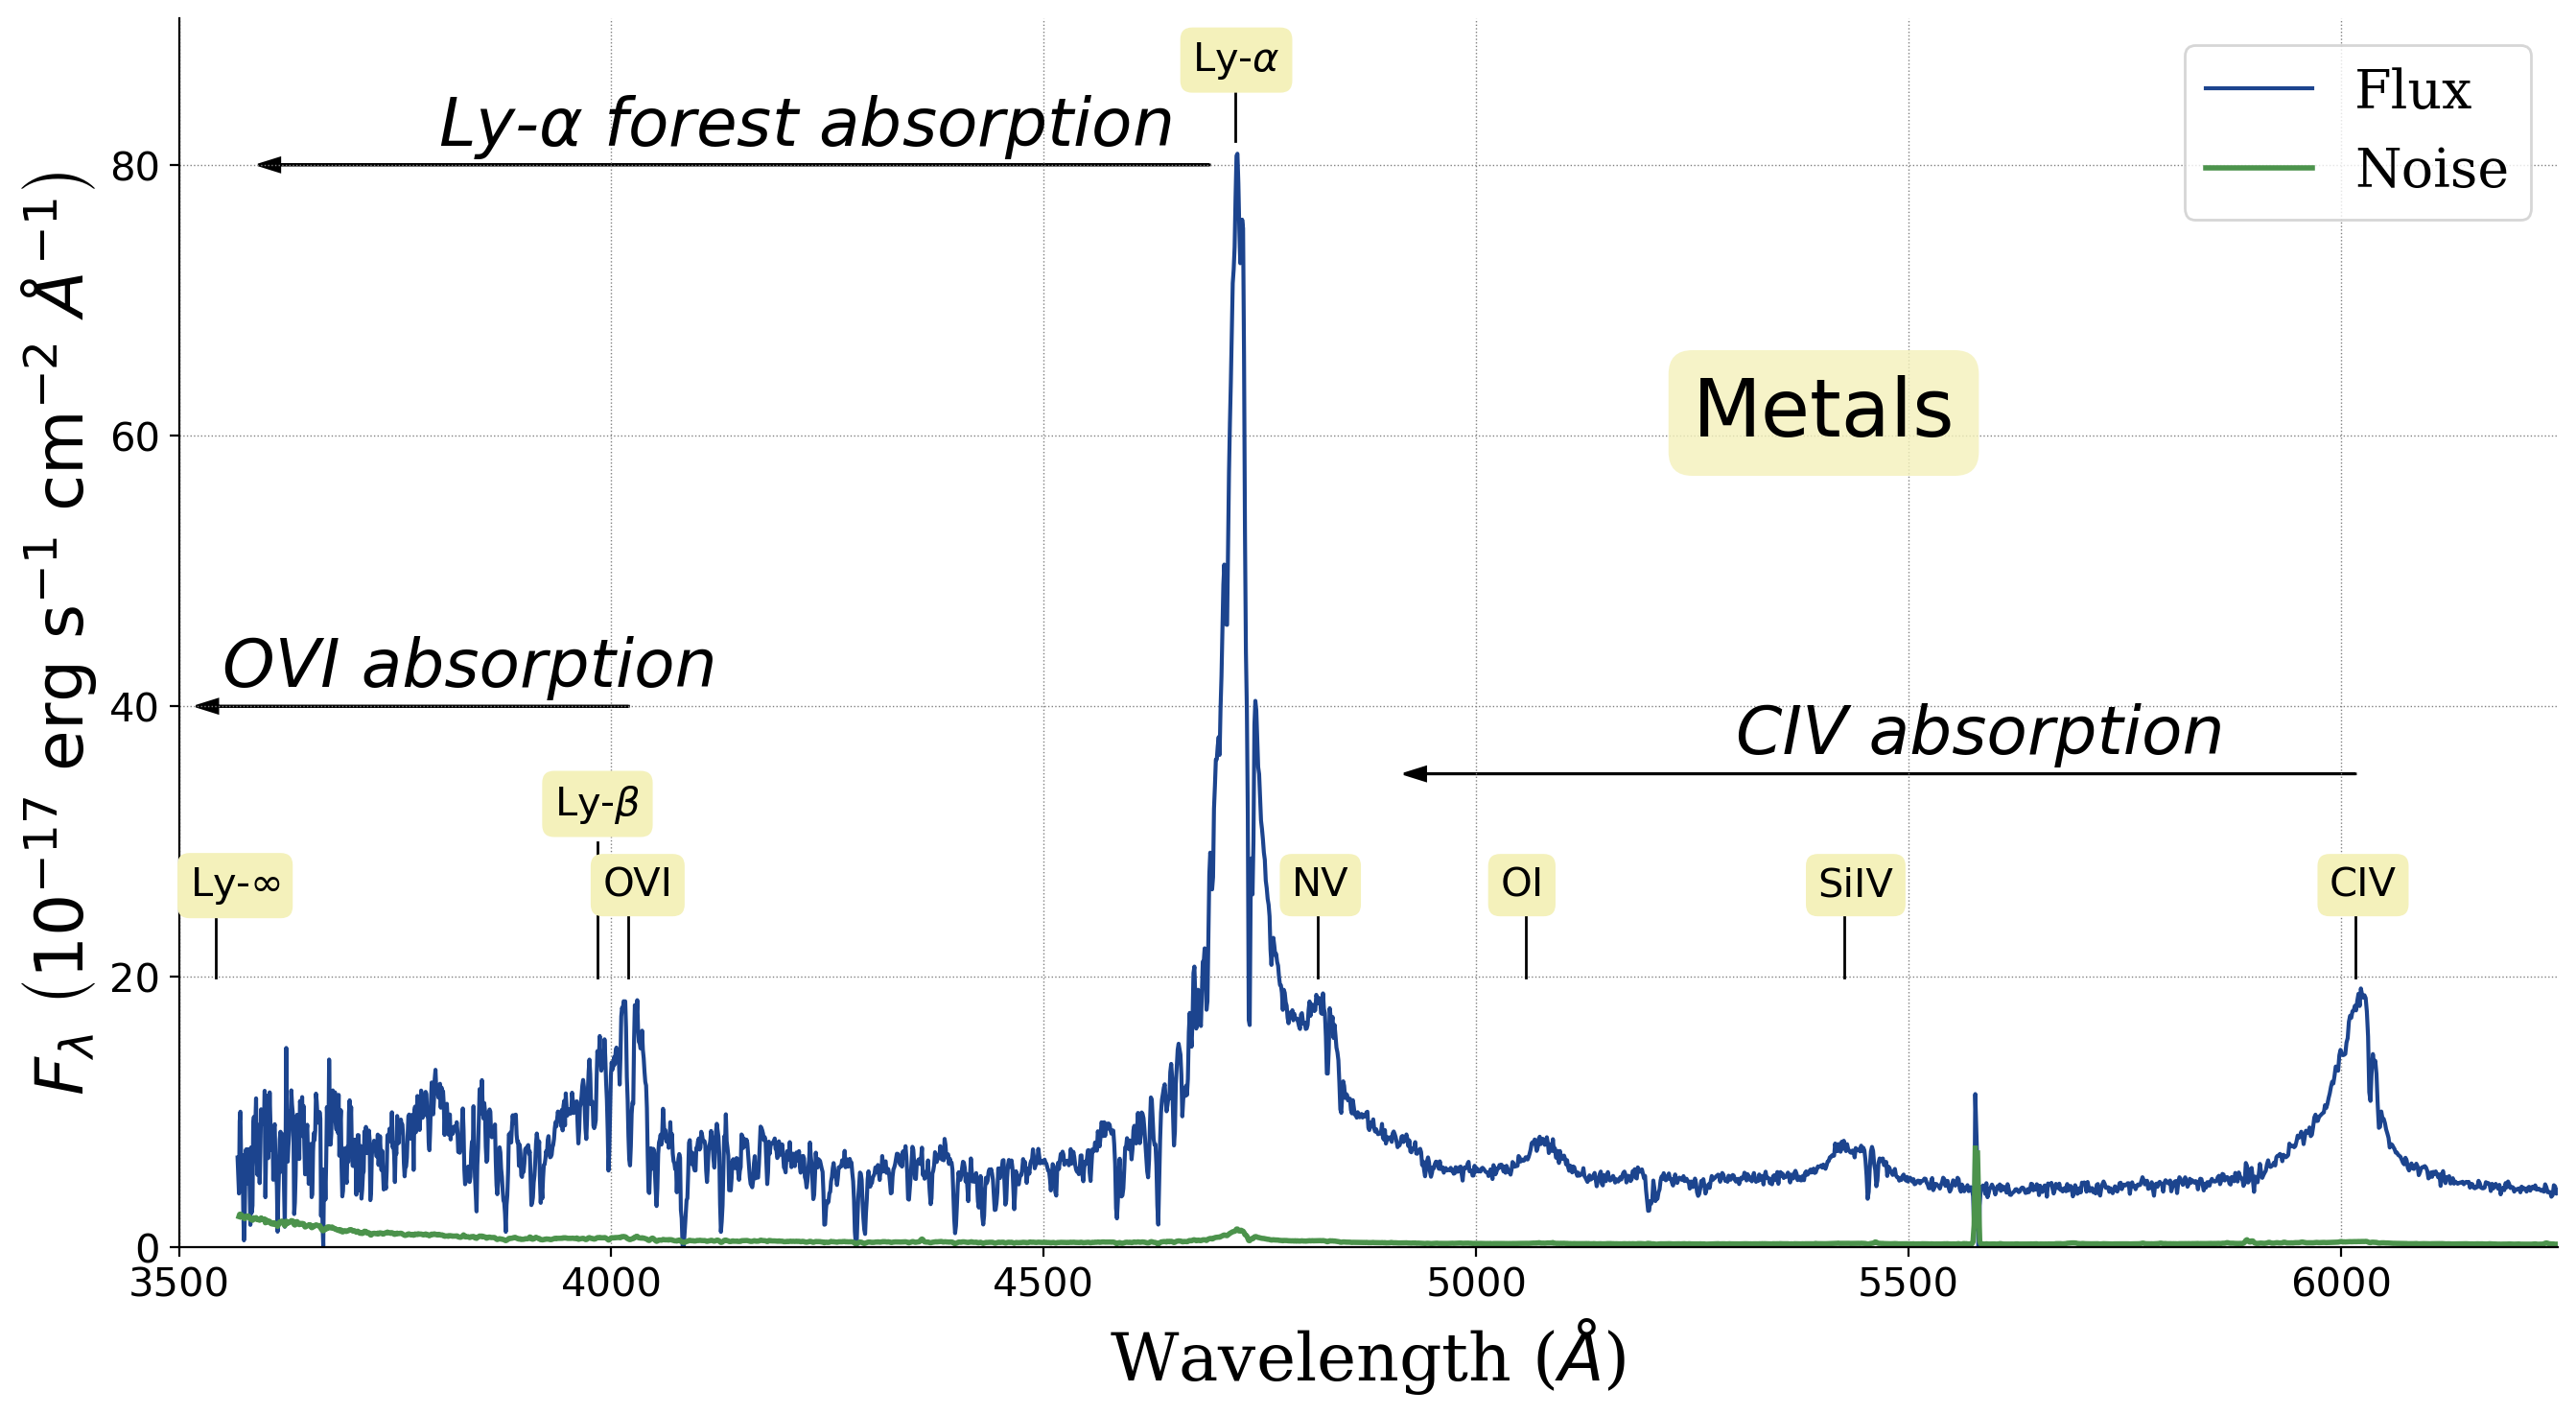

In [24]:
local_dirspc="/home/holman/FILES/"
spc = os.path.join(local_dirspc,'spec-7339-56799-0379.fits')  
file = fits.open(spc)

spectra = Table.read(file)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(16,8.32),dpi=200)
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux'\
         ,lw=1.5, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.ylabel(r"$F_{\lambda}\ \left( 10^{-17}\ {\rm erg\ s}^{-1}\ {\rm cm}^{-2}\ \AA^{-1} \right)$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlim(3500,6250)
plt.ylim(0,max(spectra['flux'])+10)
plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)


lw_fl = 1
lc_fl = 'black'
a_fl = 1
lb_lines = [0.22,0.27]

plt.axvline((1+ 2.884) * lines["Lya"][0],ymin =0.9,ymax= 0.94, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["Lyb"][0],ymin =lb_lines[0],ymax= 0.33, c=lc_fl, alpha=a_fl, linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["CIV"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["CIII"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["MgII"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
#plt.axvline((1+ 2.884) * lines["OIII"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
#plt.axvline((1+ 2.884) * lines["Ha"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["OVI"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["NV"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["CII"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
#plt.axvline((1+ 2.884) * lines["HeII"], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["SiIV"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["LyL"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)
plt.axvline((1+ 2.884) * lines["OI"][0],ymin =lb_lines[0],ymax= lb_lines[1], c=lc_fl, alpha=a_fl,ls ="-", linewidth = lw_fl)




text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#F4F1BB'

plt.text((1+ 2.884) * lines["Lya"][0]-50, 87, r'Ly-$\alpha$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["Lyb"][0]-50, 32, r'Ly-$\beta$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["LyL"][0]-text_xdel, text_ypos, r'Ly-$\infty$', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha':1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["CIV"][0]-text_xdel, text_ypos, 'CIV', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["OVI"][0]-text_xdel, text_ypos, 'OVI', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["NV"][0]-text_xdel, text_ypos, 'NV', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["SiIV"][0]-text_xdel, text_ypos, 'SiIV', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1.0, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)

plt.text((1+ 2.884) * lines["OI"][0]-text_xdel, text_ypos, 'OI', fontsize = 15, 
         bbox = {'facecolor': text_fc, 'alpha': 1.0, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)


plt.arrow((1+ 2.884) * lines["CIV"][0],35,-1100,0,length_includes_head = True,
          head_width = 1, head_length = 25, color = 'black')
plt.arrow((1+ 2.884) * lines["Lya"][0]-text_xdel,80,-1100,0,length_includes_head = True,
          head_width = 1, head_length = 25, color = 'black')
plt.arrow((1+ 2.884) * lines["OVI"][0],40,-500,0,length_includes_head = True,
          head_width = 1, head_length = 25, color = 'black')

plt.text(5300, 36.5, 'CIV absorption', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')
plt.text(3800, 81.5, r'Ly-$\alpha$ forest absorption', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')
plt.text(3550, 41.5, 'OVI absorption', fontsize = 25, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')

plt.text(5250, 60, r'Metals', fontsize = 30, 
         bbox = {'facecolor': text_fc, 'alpha': 0.8, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, rotation = text_rot)


txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('Metals', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

/tmp/ipykernel_27750/3943999652.py:20: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam']/(4.115+1),1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
/tmp/ipykernel_27750/3943999652.py:24: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)


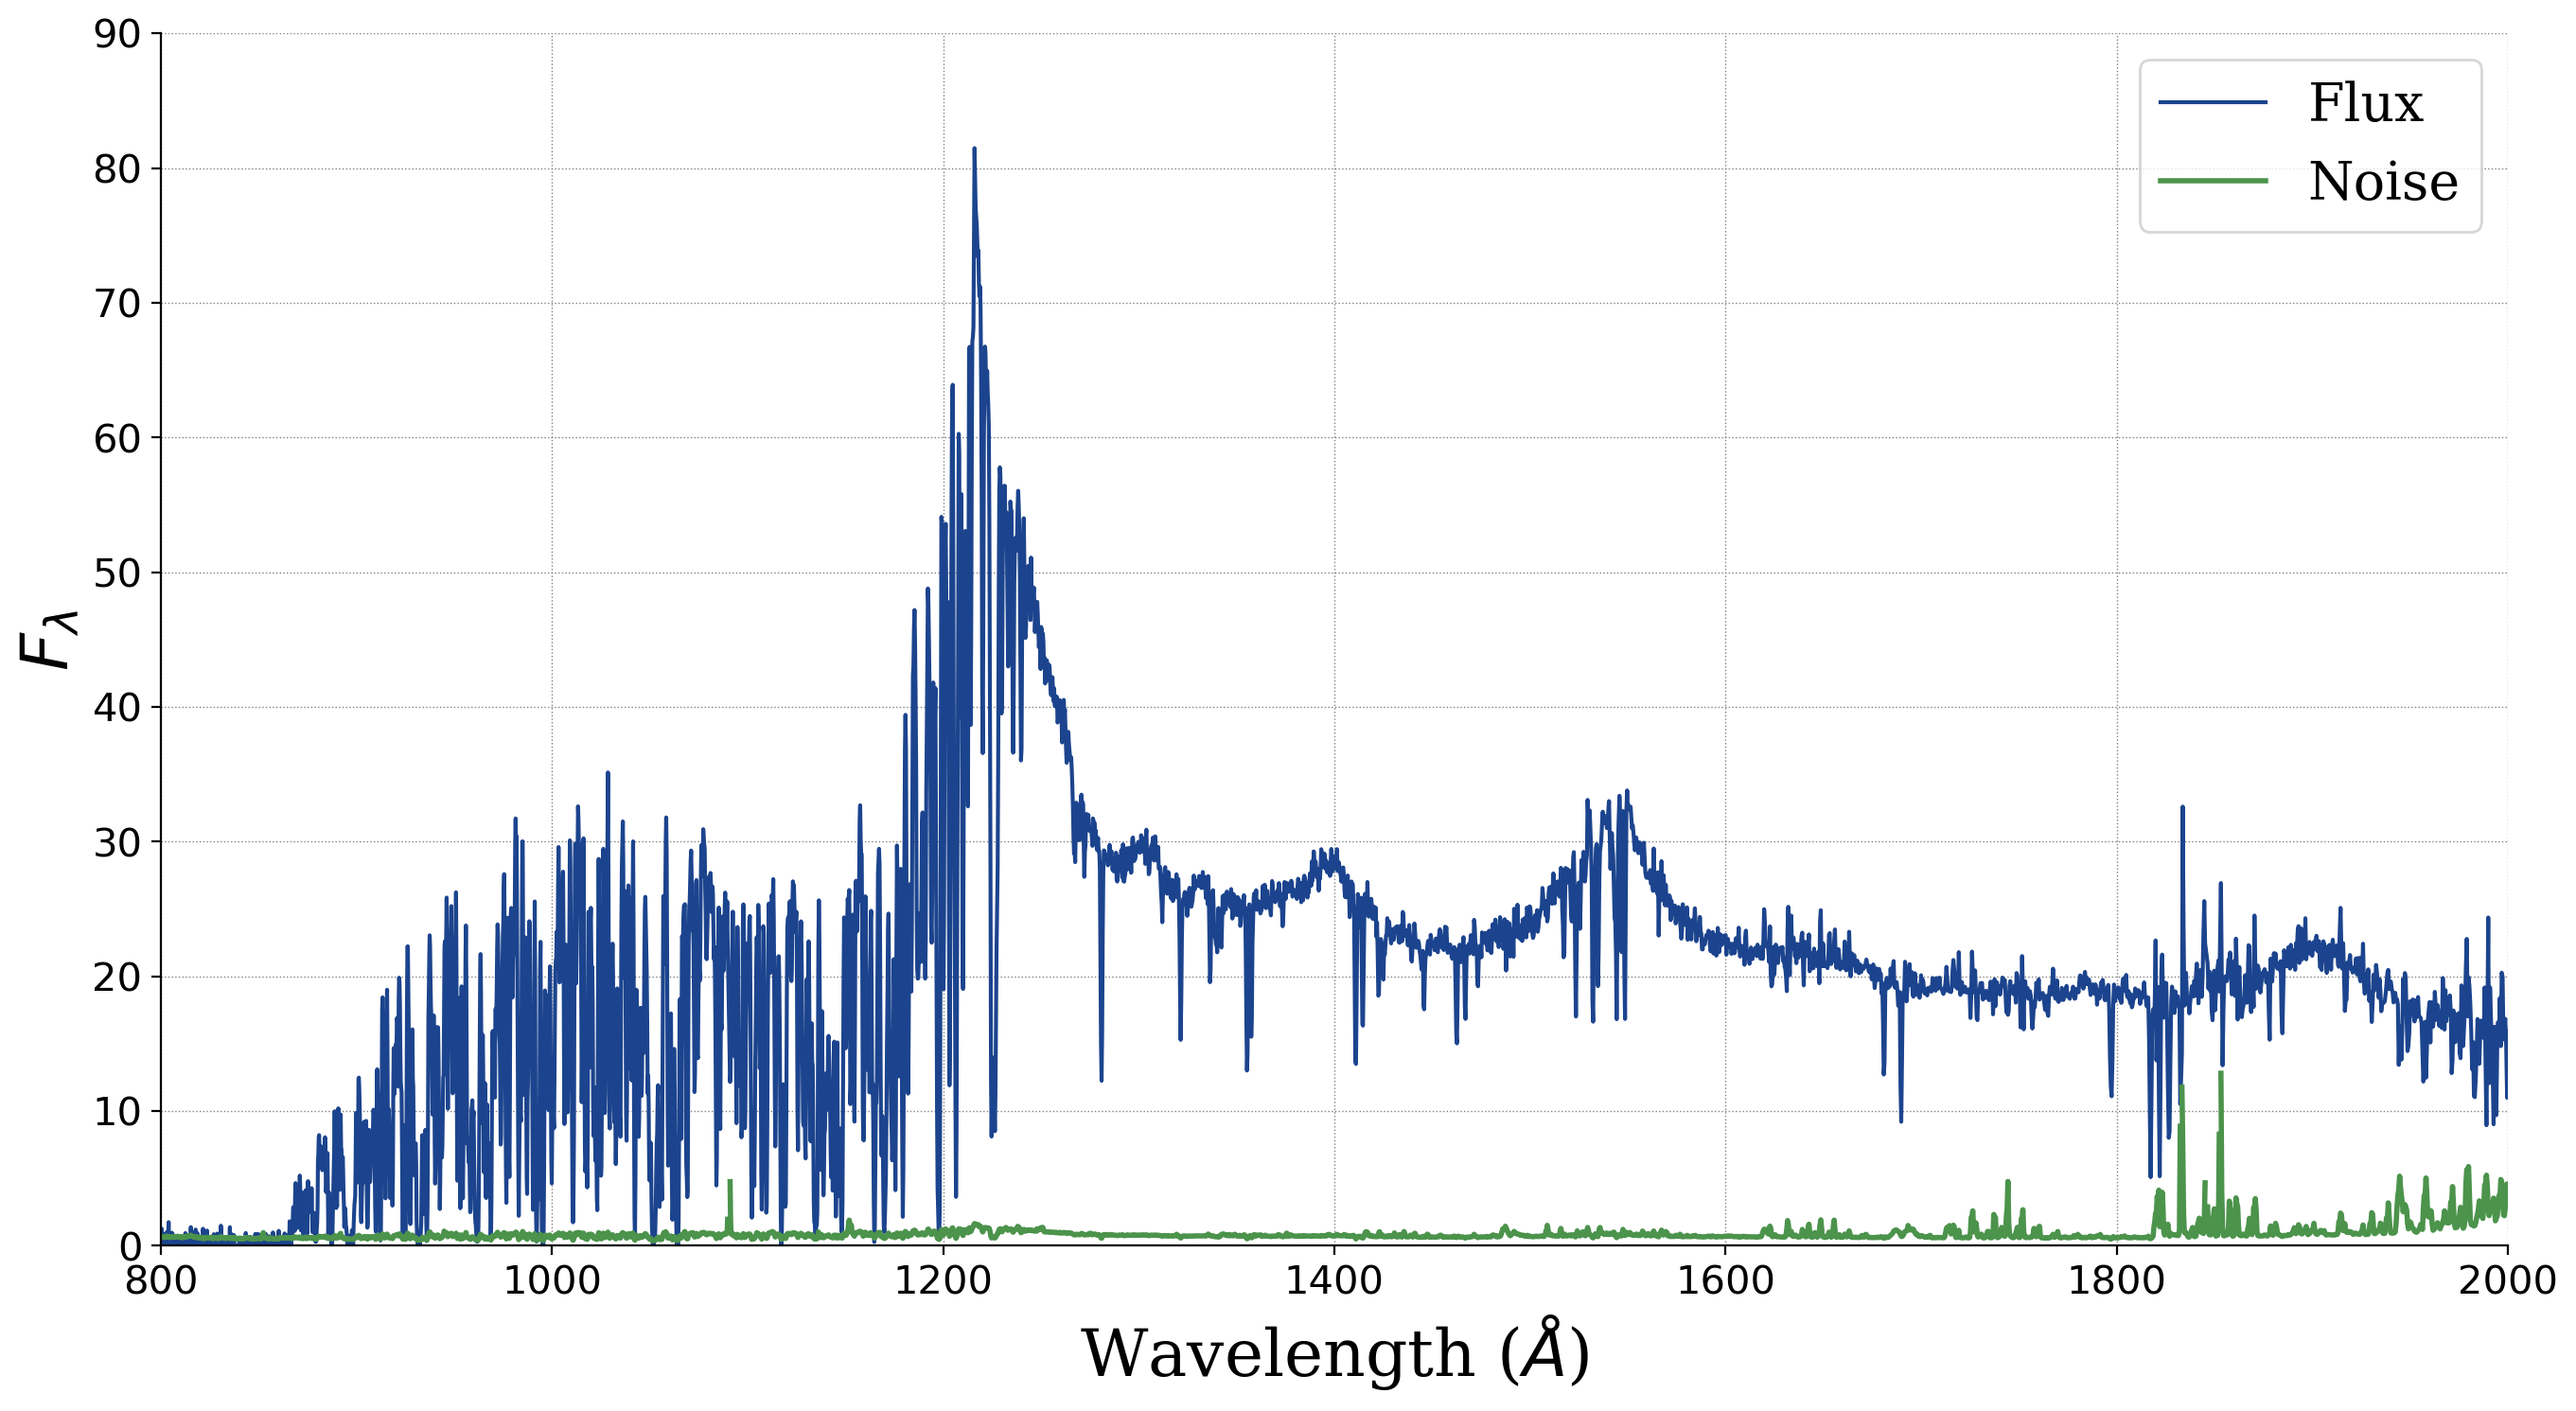

In [103]:
local_dirspc="/home/holman/FILES/"
spc = os.path.join(local_dirspc,'spec-skylines.fits')  
file = fits.open(spc)

spectra = Table.read(file)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(16,8.32),dpi=200)
plt.plot(10**spectra['loglam']/(4.115+1),spectra['flux'],label = 'Flux'\
         ,lw=1.5, color ='#1C448E')
plt.plot(10**spectra['loglam']/(4.115+1),1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')
plt.xlim(800,2000)
plt.ylim(0,90)

lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)
interv_e = np.array(lin_eboss['lambda_max'])-np.array(lin_eboss['lambda_min'])
lin_eboss['interval'] = interv_e
center_e = np.array(lin_eboss['lambda_min']) + np.array(lin_eboss['interval'])/2
lin_eboss['center'] = center_e

lw_fl = 1
lc_fl = '#0047AB'
a_fl = 1
lb_lines = [0.22,0.27]

#plt.figure(figsize=(16,8),dpi=70)

for x in range(len(lin_eboss)):
    plt.axvline(lin_eboss['center'][x],ymin =0.0,ymax= 1.0, c=lc_fl, alpha=a_fl, 
                linewidth = 1.5)   
    
plt.ylabel(r"$F_{\lambda}$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)


plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)

text_rot = 0
text_ypos = 26
text_xdel = 30
text_fc = '#98FB98'



txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('skylines spectra', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

/tmp/ipykernel_27750/4136932937.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)
/tmp/ipykernel_27750/4136932937.py:31: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


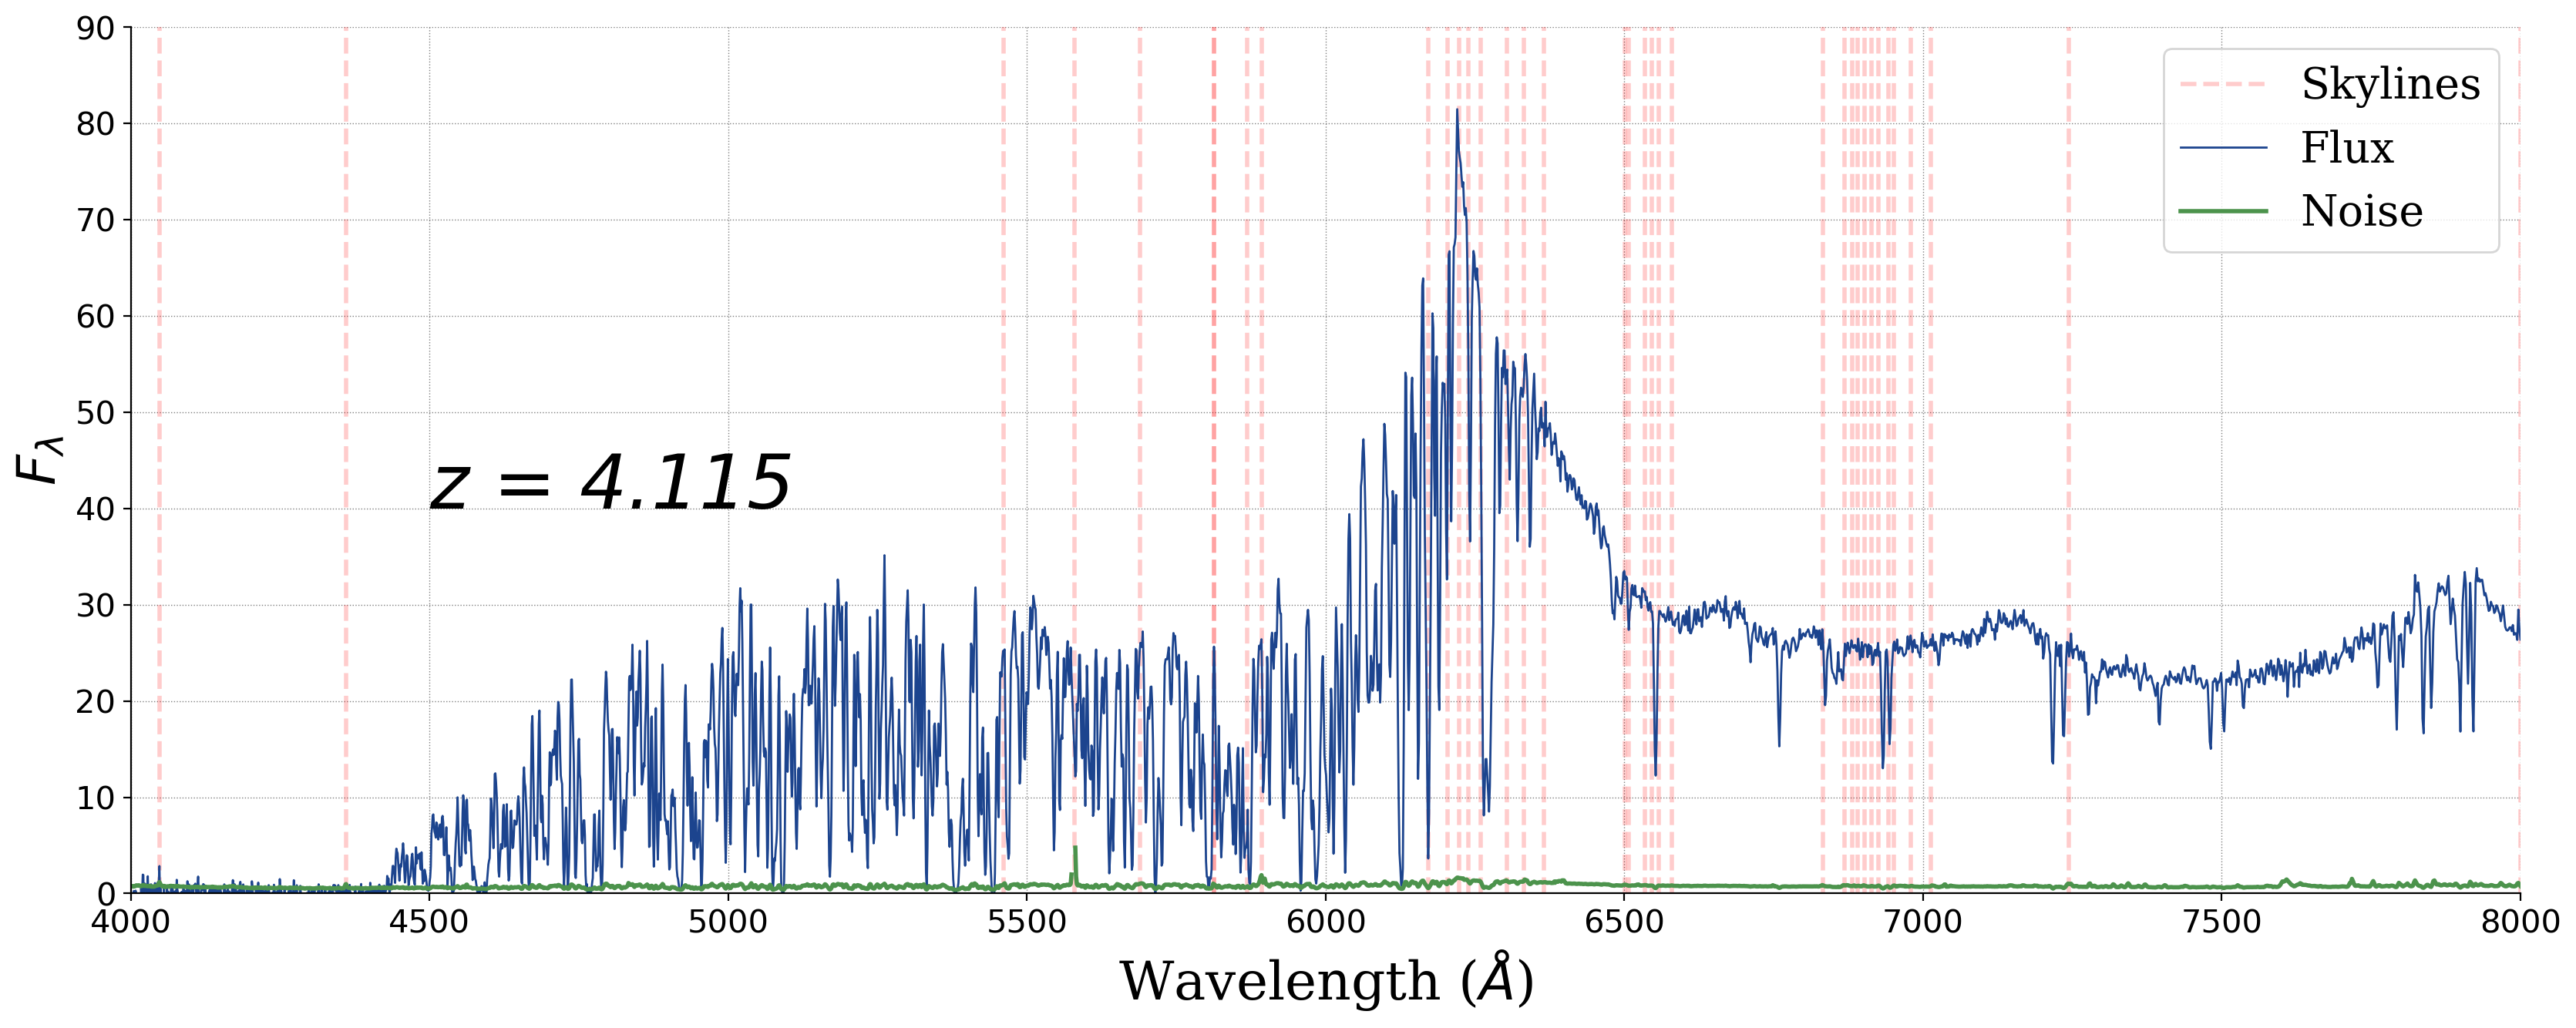

In [113]:
local_dirspc="/home/holman/FILES/"
spc = os.path.join(local_dirspc,'spec-skylines.fits')  
file = fits.open(spc)

spectra = Table.read(file)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(20,7.3),dpi=200)

lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)
interv_e = np.array(lin_eboss['lambda_max'])-np.array(lin_eboss['lambda_min'])
lin_eboss['interval'] = interv_e
center_e = np.array(lin_eboss['lambda_min']) + np.array(lin_eboss['interval'])/2
lin_eboss['center'] = center_e

for x in range(len(lin_eboss)):
    plt.axvline(lin_eboss['center'][x],ymin =0.0,ymax= 1.0, c='red', alpha=0.2,ls ="--", linewidth = 2) 

plt.axvline(8000,ymin =0.0,ymax= 1.0, c='red', alpha=0.2,ls ="--", linewidth = 2,label = 'Skylines') 
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux'\
         ,lw=1.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')

    
plt.ylabel(r"$F_{\lambda}$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.xlim(4000,8000)
plt.ylim(0,90)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.text(4500, 40, r'$z$ = 4.115', fontsize = 35, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')


plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)
txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('skylines spectra', bbox_inches='tight', transparent=True,dpi=200)
plt.show()

/tmp/ipykernel_27750/3448278637.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)
/tmp/ipykernel_27750/3448278637.py:31: RuntimeWarning: divide by zero encountered in divide
  plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')


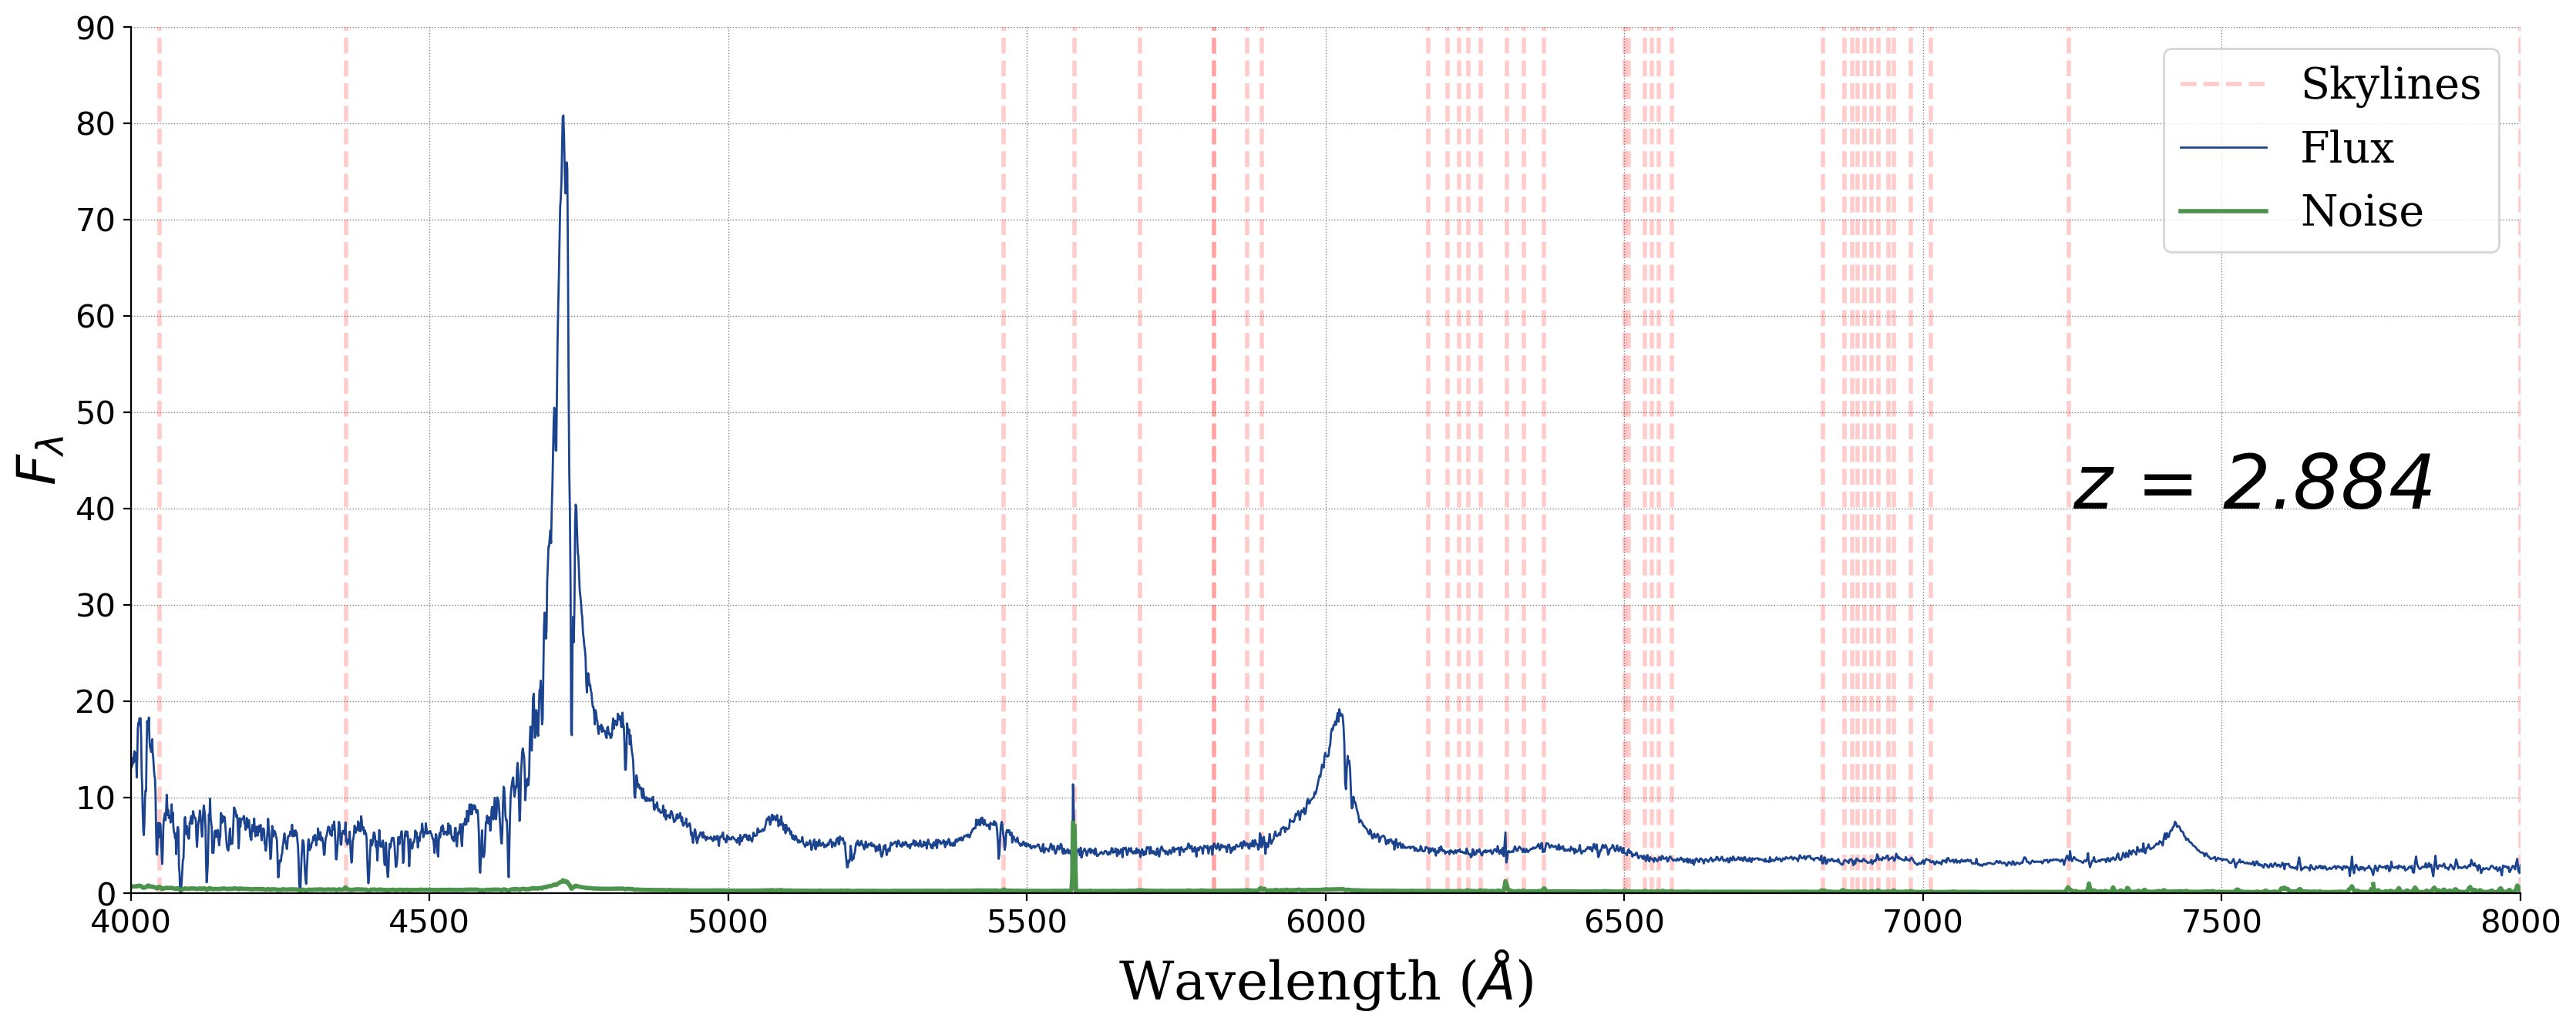

In [112]:
local_dirspc="/home/holman/FILES/"
spc = os.path.join(local_dirspc,'spec-7339-56799-0379.fits')  
file = fits.open(spc)

spectra = Table.read(file)
info_add = fits.open(spc)[2]
add = Table.read(info_add)
tipe = str(add['OBJTYPE'][0])


plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


plt.figure(figsize=(20,7.3),dpi=200)

lin_eboss = pd.read_csv('/home/holman/p1d_tools/To_organize/lines_eboss.txt',delim_whitespace=True, skiprows=0)
interv_e = np.array(lin_eboss['lambda_max'])-np.array(lin_eboss['lambda_min'])
lin_eboss['interval'] = interv_e
center_e = np.array(lin_eboss['lambda_min']) + np.array(lin_eboss['interval'])/2
lin_eboss['center'] = center_e

for x in range(len(lin_eboss)):
    plt.axvline(lin_eboss['center'][x],ymin =0.0,ymax= 1.0, c='red', alpha=0.2,ls ="--", linewidth = 2) 

plt.axvline(8000,ymin =0.0,ymax= 1.0, c='red', alpha=0.2,ls ="--", linewidth = 2,label = 'Skylines') 
plt.plot(10**spectra['loglam'],spectra['flux'],label = 'Flux'\
         ,lw=1.0, color ='#1C448E')
plt.plot(10**spectra['loglam'],1/np.sqrt(spectra['ivar']),lw=2, color = '#4C934C',label = 'Noise')

    
plt.ylabel(r"$F_{\lambda}$", style = 'normal', family = 'serif', size = 25)
plt.xlabel('Wavelength ($\AA$)', style = 'normal', family = 'serif', size = 25)
plt.xlim(4000,8000)
plt.ylim(0,90)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.text(7250, 40, r'$z$ = 2.884', fontsize = 35, 
         bbox = {'facecolor': 'none', 'alpha': 0.3, 'boxstyle': "round,pad=0.3", 'ec': 'none'},
         rotation = text_rot, style = 'oblique')


plt.grid(True, which="both", ls=":", color = 'gray', linewidth = 0.5)
txt_prop = {'style' : 'normal', 'family' : 'serif', 'size' :20}
plt.legend(prop = txt_prop, loc= 'upper right')
plt.savefig('skylines spectra', bbox_inches='tight', transparent=True,dpi=200)
plt.show()